In [2]:
suppressMessages(library(rmarkdown))
suppressMessages(library(dplyr))
suppressMessages(library(Seurat))
suppressMessages(library(patchwork))
suppressMessages(library(grDevices))
suppressMessages(library(ggplot2))
suppressMessages(library(viridis))
suppressMessages(library(DT))
suppressMessages(library(ggrepel))
suppressMessages(library(DESeq2))
suppressMessages(library(gridExtra))
suppressMessages(library(stringr))
suppressMessages(library(ggblur))
suppressMessages(library(patchwork))
suppressMessages(library(enrichR))
#source("/home/rlancione/scripts/utils.R")

In [87]:
DATA <- "/projects/ps-epigen/users/cmiciano/ASAP_Aaron/outputs/find_marks/230613/default_thres/"
OUTPATH <- "/projects/ps-epigen/users/kdang/ASAP/progressReport/"

# mirror barplot

In [110]:
broad_cts <- list.files(paste0(DATA, "broad_ct/"), pattern = ".txt")
broad_cts <- broad_cts[-2]
broad_cts <- gsub(".txt","",broad_cts)
broad_cts

[1] "Astrocytes"    "GABAergic"     "Glutamatergic" "Macrophages"  
[5] "Meis2"         "Non-neuronal"  "Oligo"

In [111]:
DEG_file <- read.table(paste0(DATA,"sub_ct/DEG_countSummary.txt"))
colnames(DEG_file) <- c("celltype","regulation","counts")
head(DEG_file)
sort(unique(DEG_file$celltype))

celltype    regulation counts
1 GABAergic.6 UP         310   
2 GABAergic.6 DOWN       268   
3 GABAergic.6 COMBINED   578   
4 Meis2       UP         175   
5 Meis2       DOWN        32   
6 Meis2       COMBINED   207

[1] "Astrocytes"      "GABAergic.1"     "GABAergic.10"    "GABAergic.11"   
 [5] "GABAergic.12"    "GABAergic.13"    "GABAergic.14"    "GABAergic.15"   
 [9] "GABAergic.2"     "GABAergic.3"     "GABAergic.4"     "GABAergic.5"    
[13] "GABAergic.6"     "GABAergic.7"     "GABAergic.8"     "GABAergic.9"    
[17] "Glutamatergic.1" "Glutamatergic.2" "Glutamatergic.3" "Glutamatergic.4"
[21] "Glutamatergic.5" "Macrophages"     "Meis2"           "Non-neuronal"   
[25] "Oligo"

[1] "Astrocytes"
     celltype regulation counts
56 Astrocytes       DOWN     48
[1] -48
     celltype regulation counts
55 Astrocytes         UP    481
[1] 481
   celltypes up_deg down_deg
1 Astrocytes    481      -48
   celltypes up_deg down_deg
1 Astrocytes    481      -48


Warning message in geom_text(data = up_down_df, aes(x = celltypes, y = down_deg, :
“Ignoring unknown aesthetics: fill”


[1] "GABAergic"
       celltype regulation counts
2   GABAergic.6       DOWN    268
11  GABAergic.2       DOWN    144
23  GABAergic.4       DOWN    297
29  GABAergic.1       DOWN    181
32  GABAergic.3       DOWN    185
35  GABAergic.8       DOWN     43
41  GABAergic.7       DOWN     54
44  GABAergic.5       DOWN     94
50 GABAergic.10       DOWN     78
53  GABAergic.9       DOWN     59
59 GABAergic.11       DOWN    587
62 GABAergic.14       DOWN    831
68 GABAergic.12       DOWN    145
71 GABAergic.15       DOWN    359
74 GABAergic.13       DOWN    188
 [1] -268 -144 -297 -181 -185  -43  -54  -94  -78  -59 -587 -831 -145 -359 -188
       celltype regulation counts
1   GABAergic.6         UP    310
10  GABAergic.2         UP    273
22  GABAergic.4         UP    348
28  GABAergic.1         UP    310
31  GABAergic.3         UP    262
34  GABAergic.8         UP    236
40  GABAergic.7         UP    259
43  GABAergic.5         UP    247
49 GABAergic.10         UP    326
52  GABAergic.9     

Warning message in geom_text(data = up_down_df, aes(x = celltypes, y = down_deg, :
“Ignoring unknown aesthetics: fill”


[1] "Glutamatergic"
          celltype regulation counts
8  Glutamatergic.1       DOWN    370
26 Glutamatergic.2       DOWN    392
38 Glutamatergic.3       DOWN    386
47 Glutamatergic.4       DOWN    743
65 Glutamatergic.5       DOWN    448
[1] -370 -392 -386 -743 -448
          celltype regulation counts
7  Glutamatergic.1         UP    354
25 Glutamatergic.2         UP    351
37 Glutamatergic.3         UP    264
46 Glutamatergic.4         UP    682
64 Glutamatergic.5         UP    550
[1] 354 351 264 682 550
        celltypes up_deg down_deg
1 Glutamatergic.1    354     -370
2 Glutamatergic.2    351     -392
3 Glutamatergic.3    264     -386
4 Glutamatergic.4    682     -743
5 Glutamatergic.5    550     -448
        celltypes up_deg down_deg
1 Glutamatergic.1    354     -370
2 Glutamatergic.2    351     -392
3 Glutamatergic.3    264     -386
4 Glutamatergic.4    682     -743
5 Glutamatergic.5    550     -448


Warning message in geom_text(data = up_down_df, aes(x = celltypes, y = down_deg, :
“Ignoring unknown aesthetics: fill”


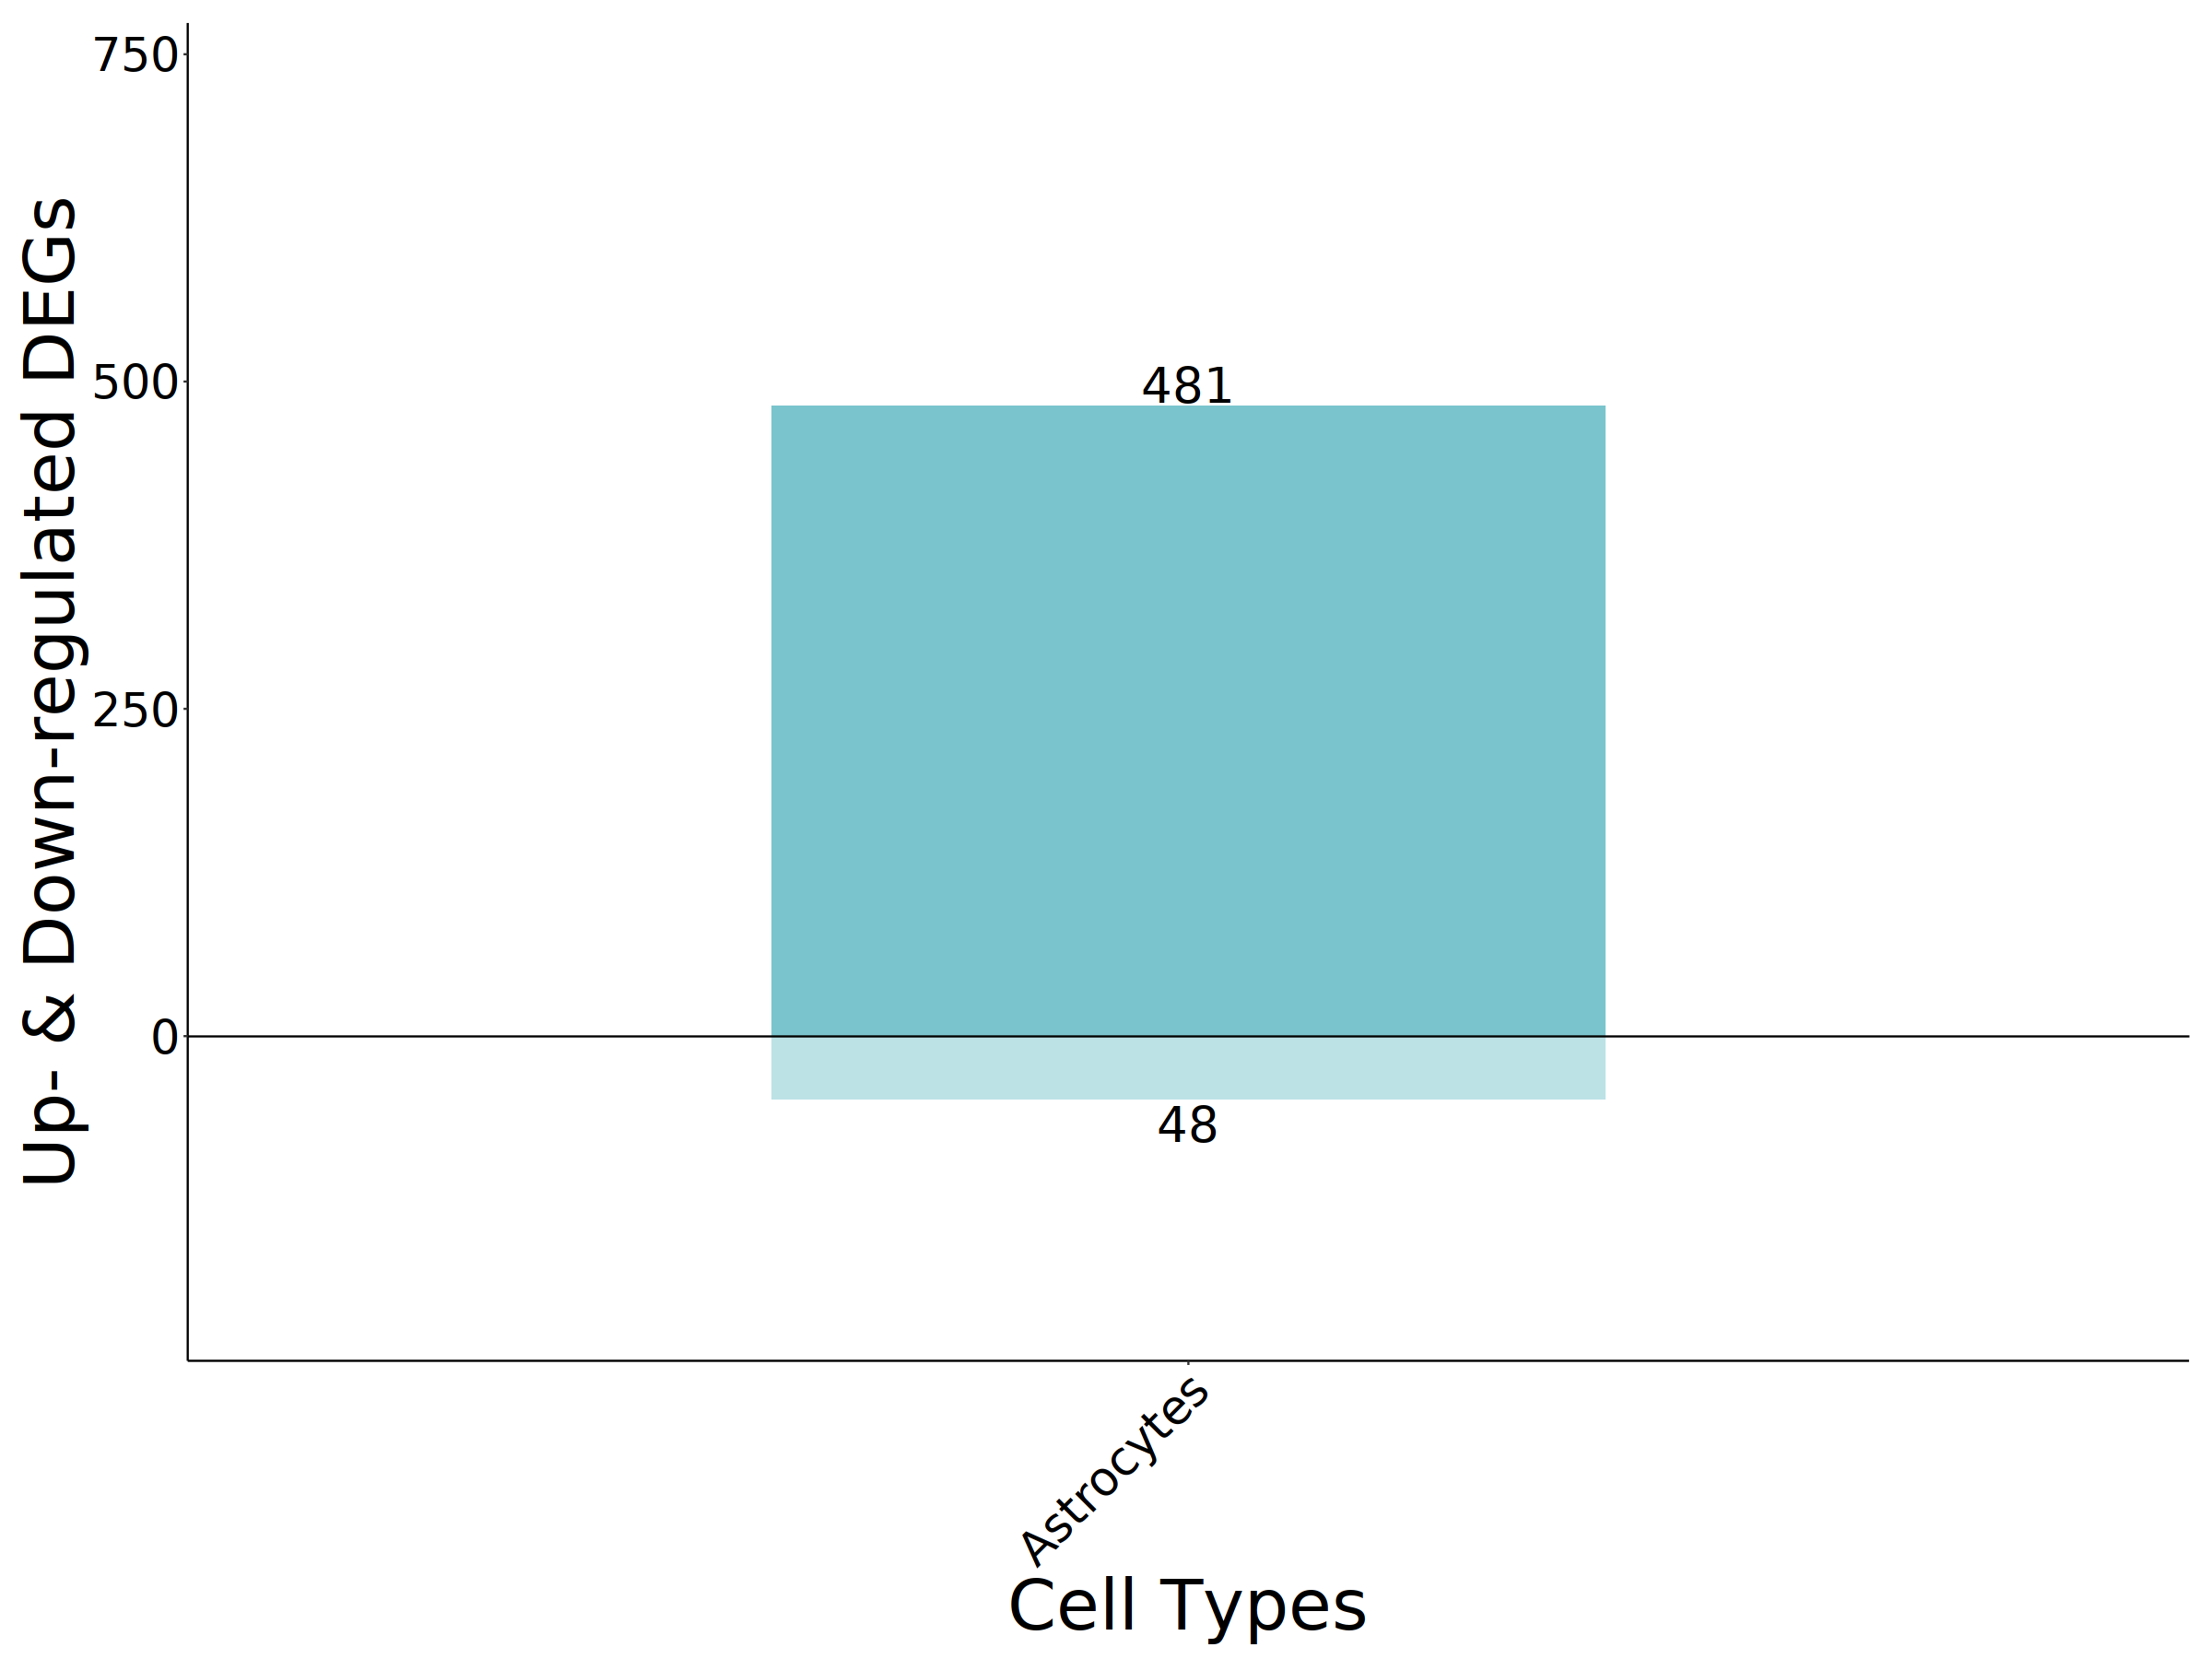

[1] "Macrophages"
      celltype regulation counts
20 Macrophages       DOWN     17
[1] -17
      celltype regulation counts
19 Macrophages         UP    249
[1] 249
    celltypes up_deg down_deg
1 Macrophages    249      -17
  celltypes up_deg down_deg
1 Microglia    249      -17


Warning message in geom_text(data = up_down_df, aes(x = celltypes, y = down_deg, :
“Ignoring unknown aesthetics: fill”


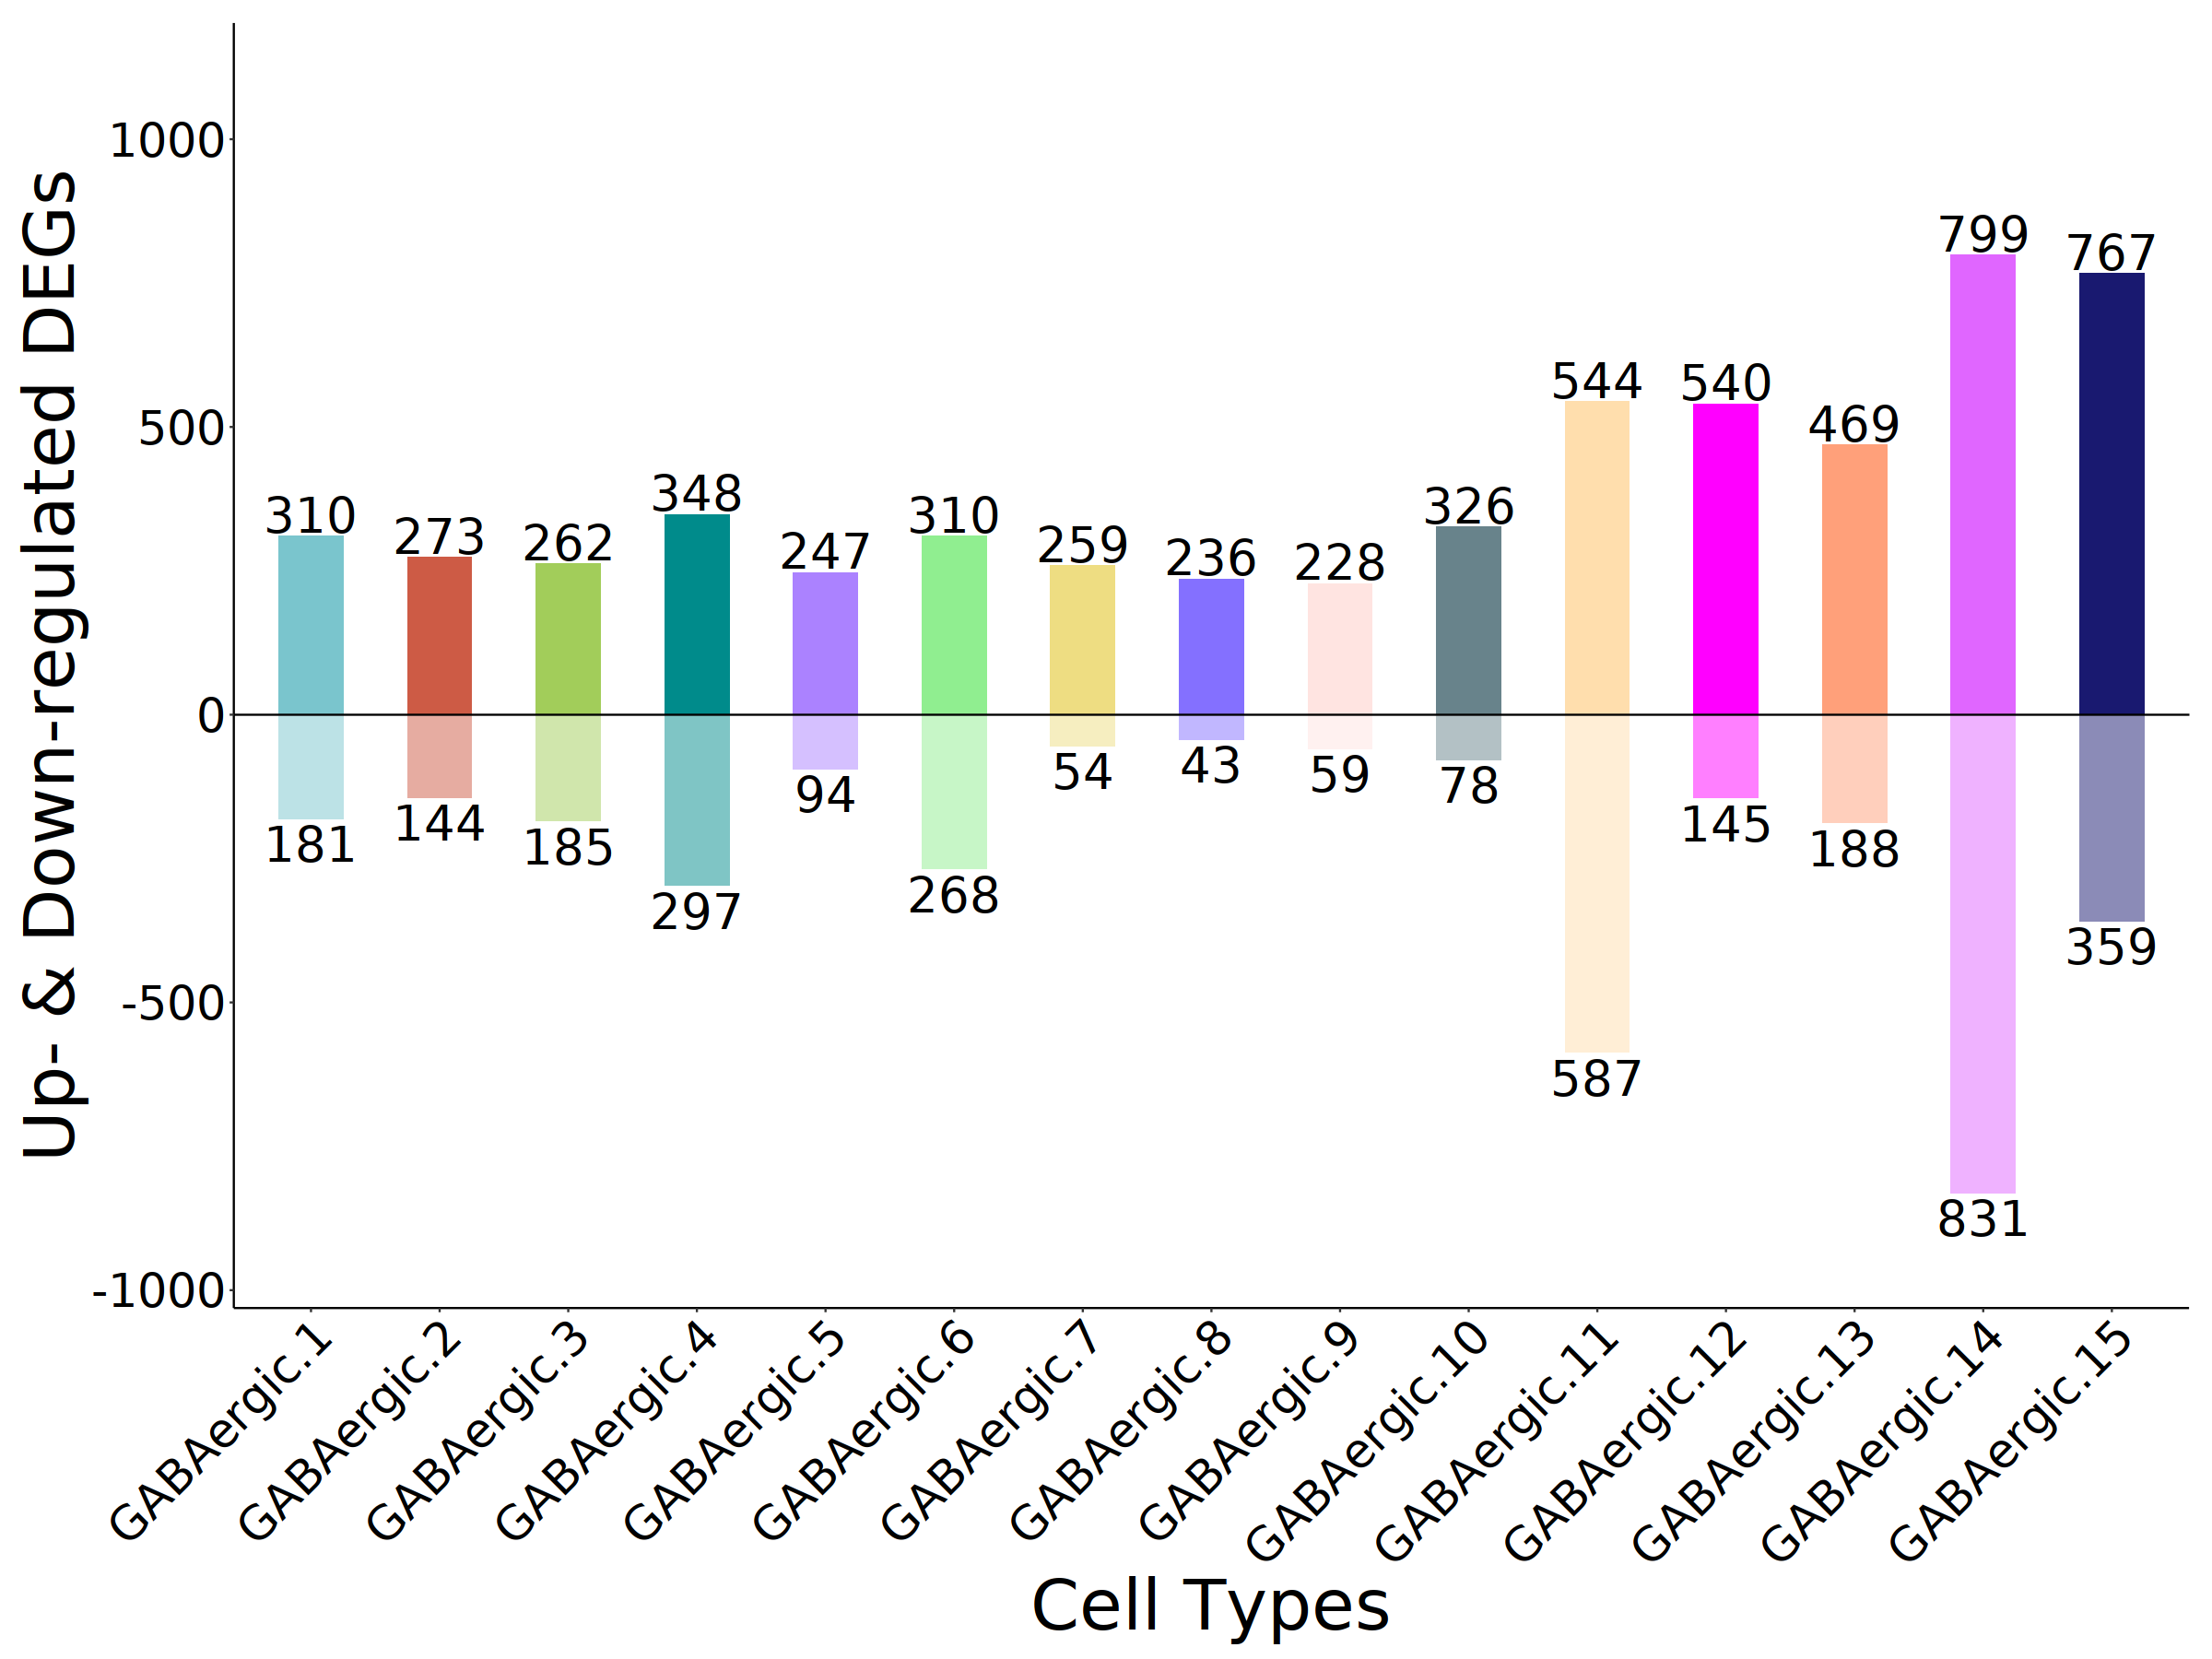

[1] "Meis2"
  celltype regulation counts
5    Meis2       DOWN     32
[1] -32
  celltype regulation counts
4    Meis2         UP    175
[1] 175
  celltypes up_deg down_deg
1     Meis2    175      -32
  celltypes up_deg down_deg
1     Meis2    175      -32


Warning message in geom_text(data = up_down_df, aes(x = celltypes, y = down_deg, :
“Ignoring unknown aesthetics: fill”


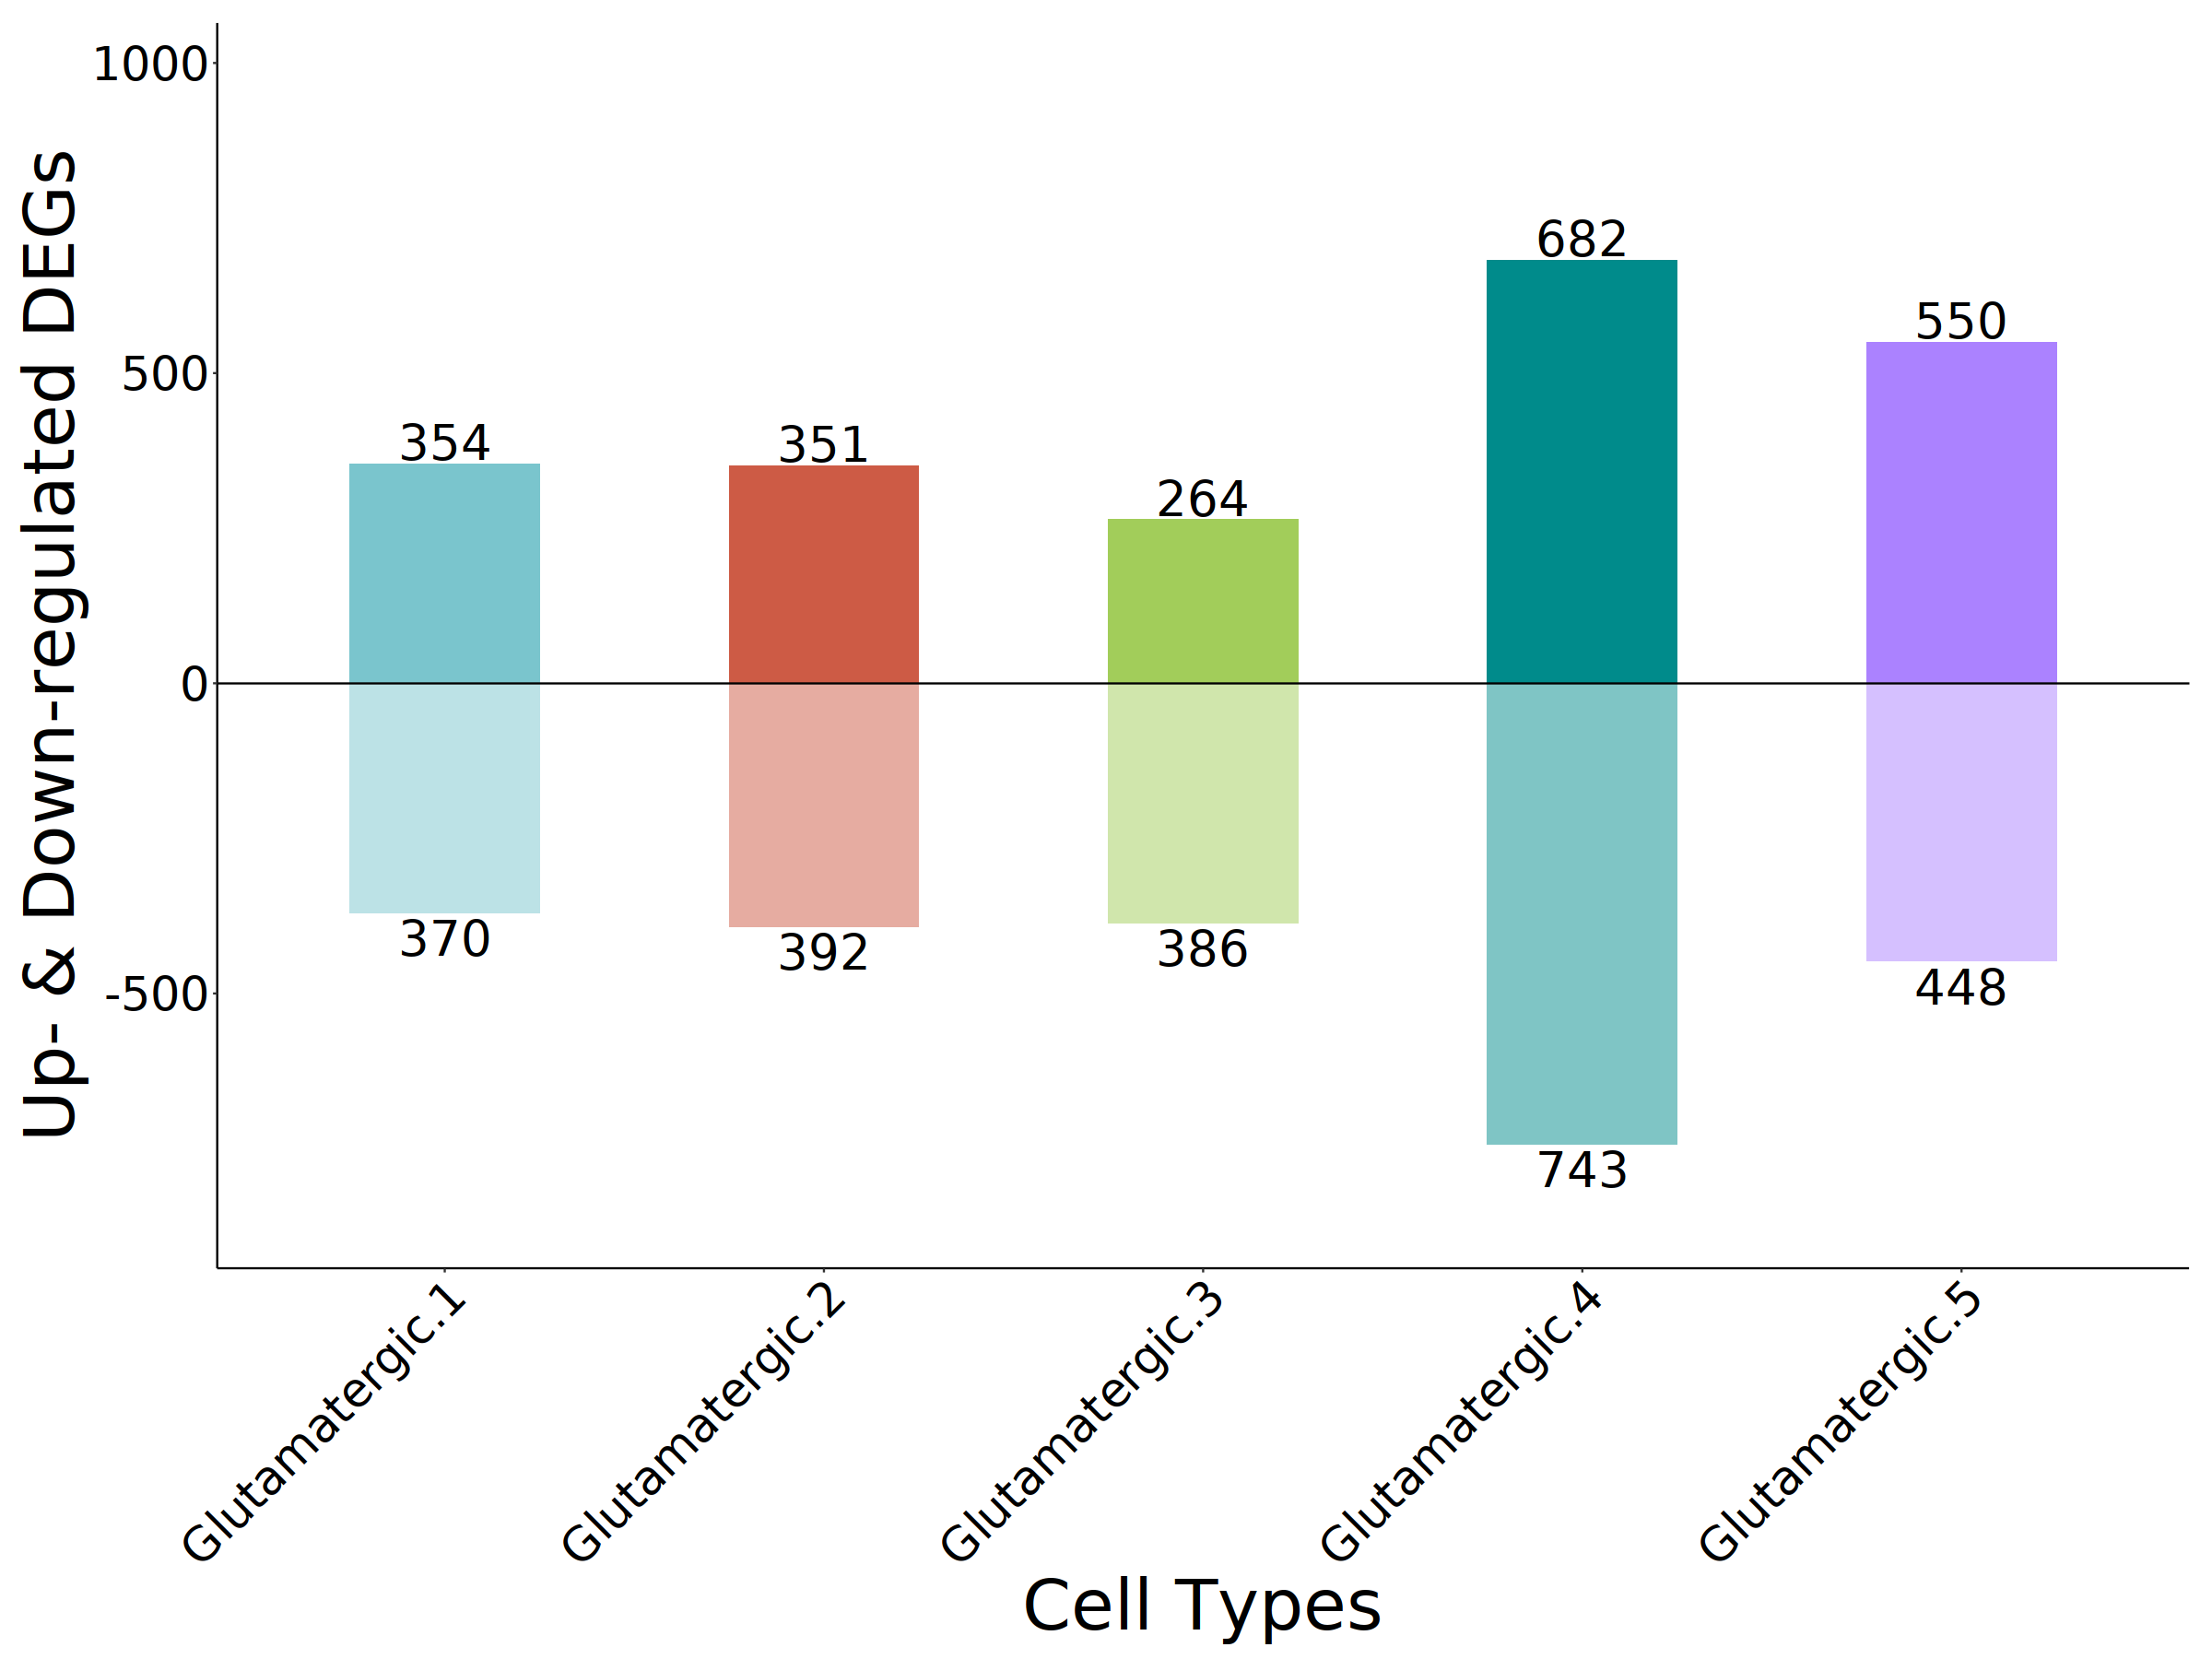

[1] "Non-neuronal"
       celltype regulation counts
14 Non-neuronal       DOWN     53
[1] -53
       celltype regulation counts
13 Non-neuronal         UP    396
[1] 396
     celltypes up_deg down_deg
1 Non-neuronal    396      -53
  celltypes up_deg down_deg
1      OPCs    396      -53


Warning message in geom_text(data = up_down_df, aes(x = celltypes, y = down_deg, :
“Ignoring unknown aesthetics: fill”


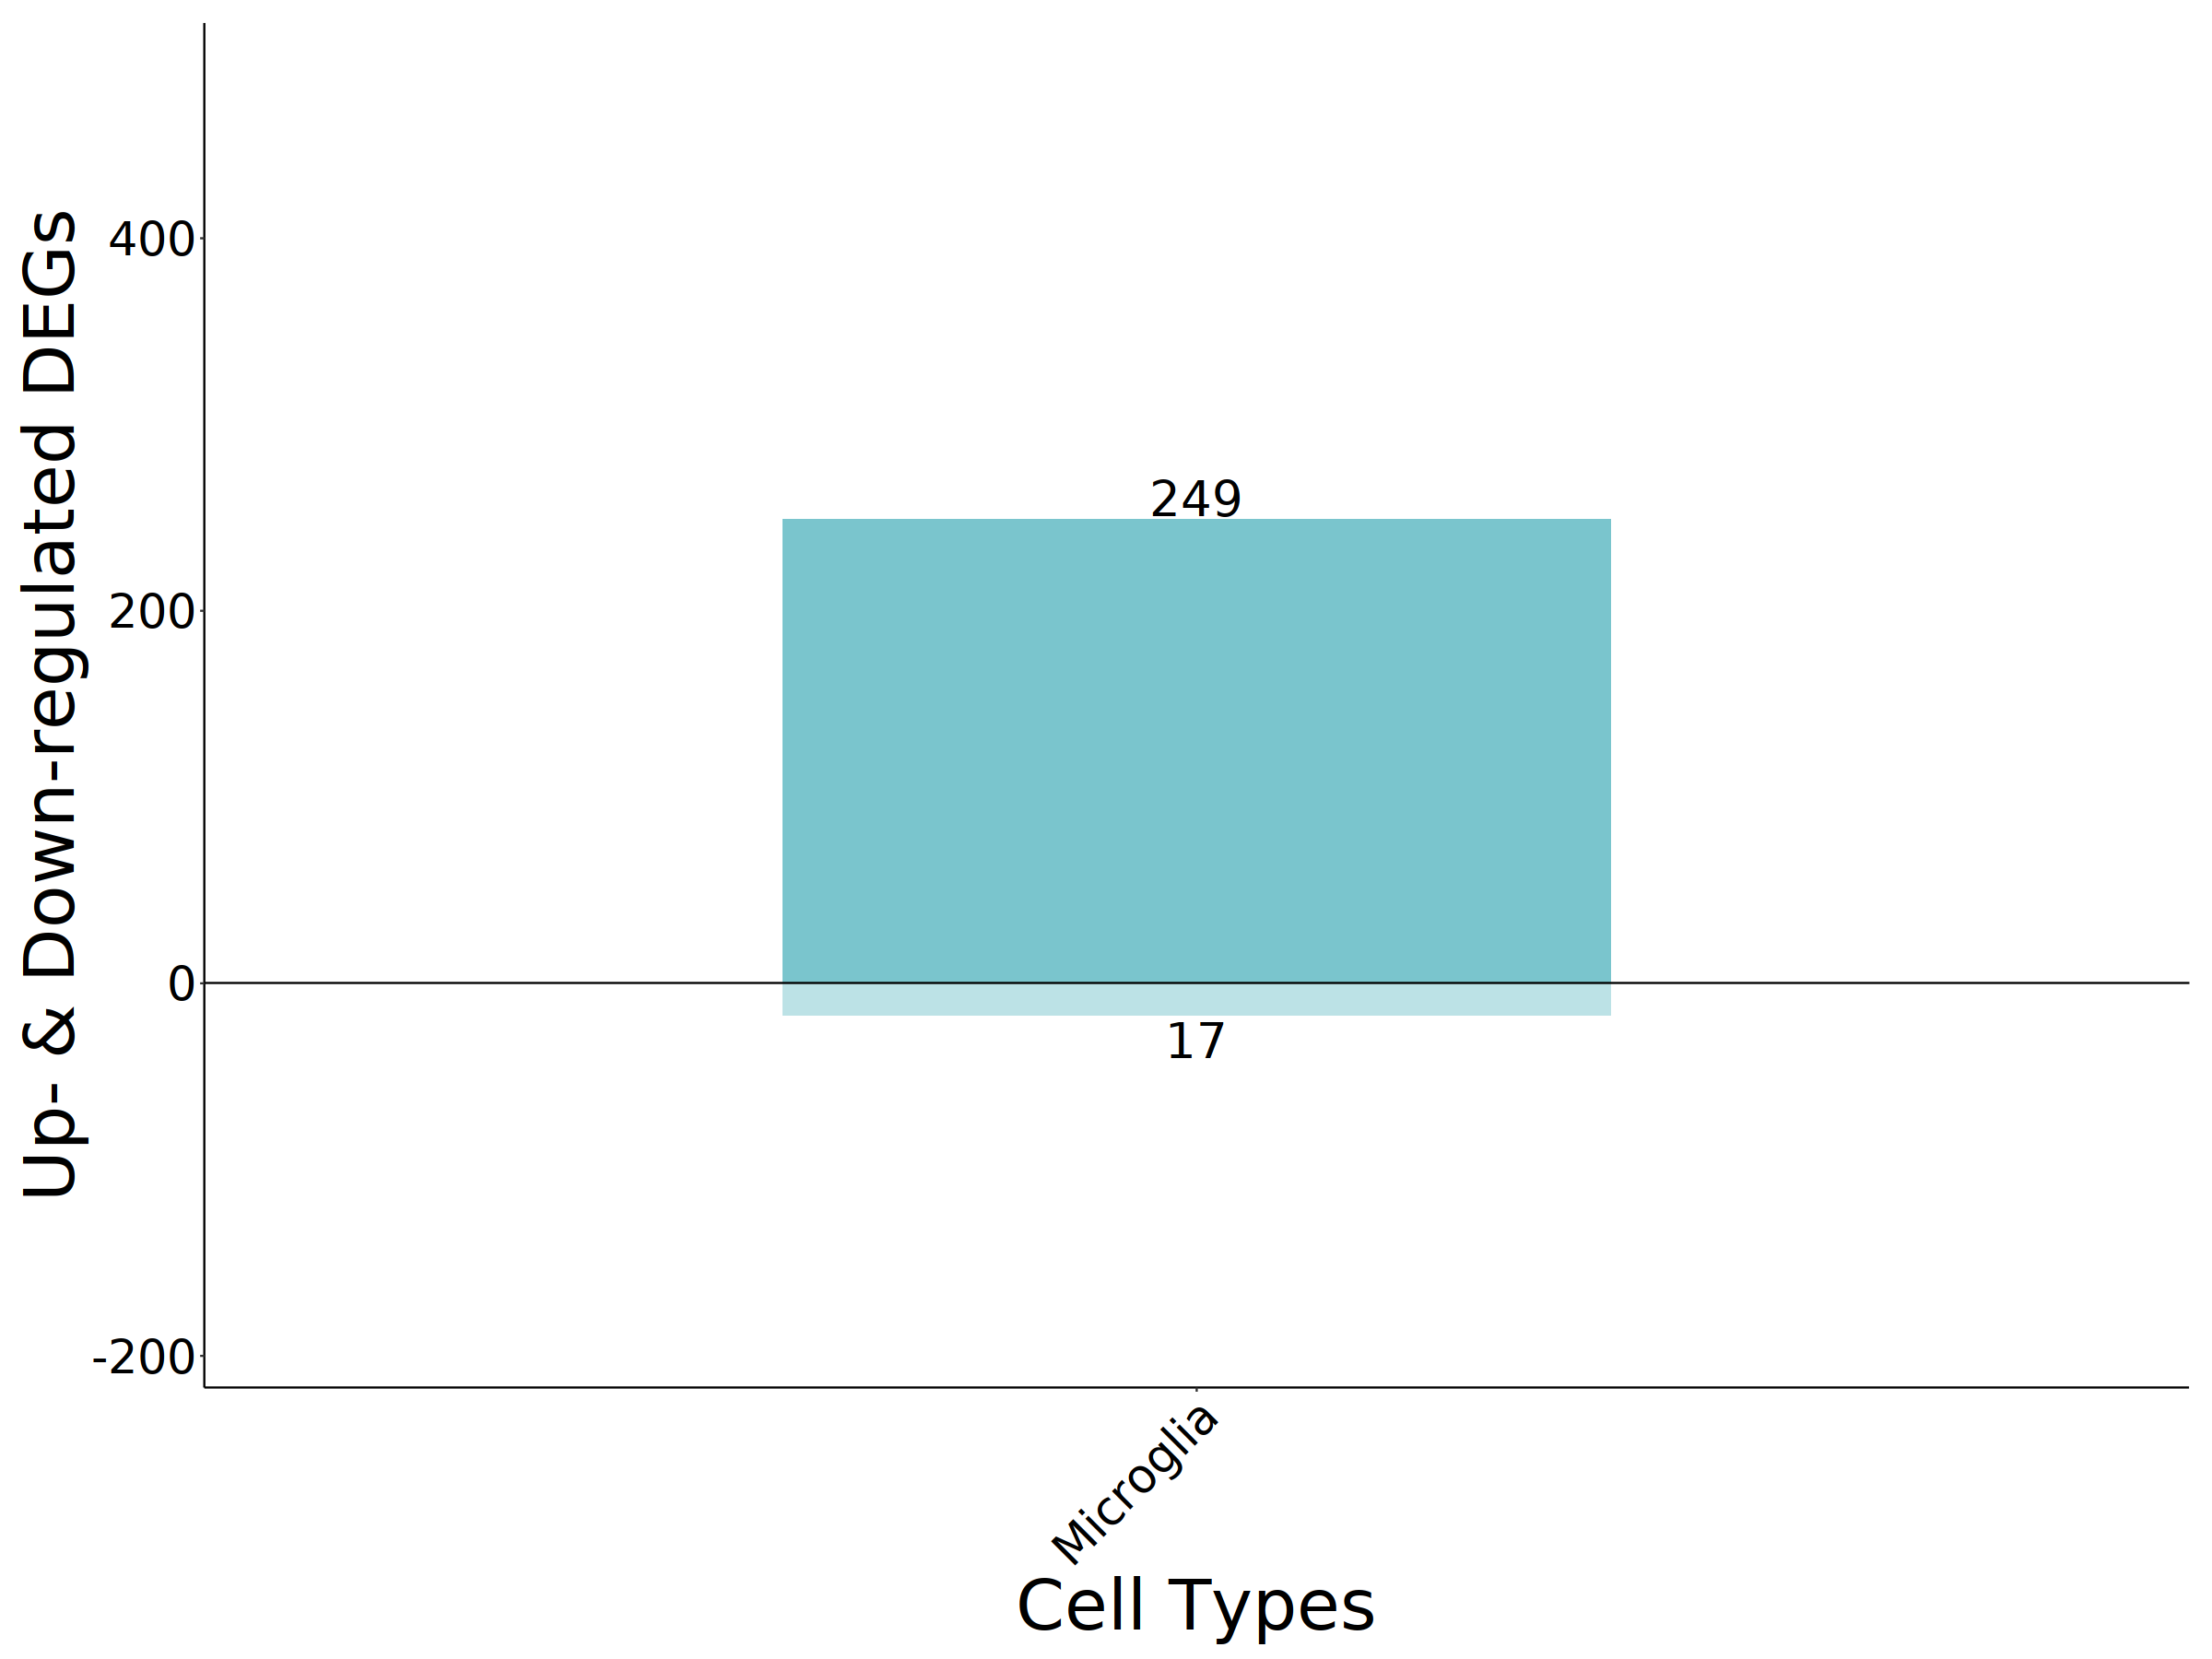

[1] "Oligo"
   celltype regulation counts
17    Oligo       DOWN     13
[1] -13
   celltype regulation counts
16    Oligo         UP    206
[1] 206
  celltypes up_deg down_deg
1     Oligo    206      -13
  celltypes up_deg down_deg
1     Oligo    206      -13


Warning message in geom_text(data = up_down_df, aes(x = celltypes, y = down_deg, :
“Ignoring unknown aesthetics: fill”


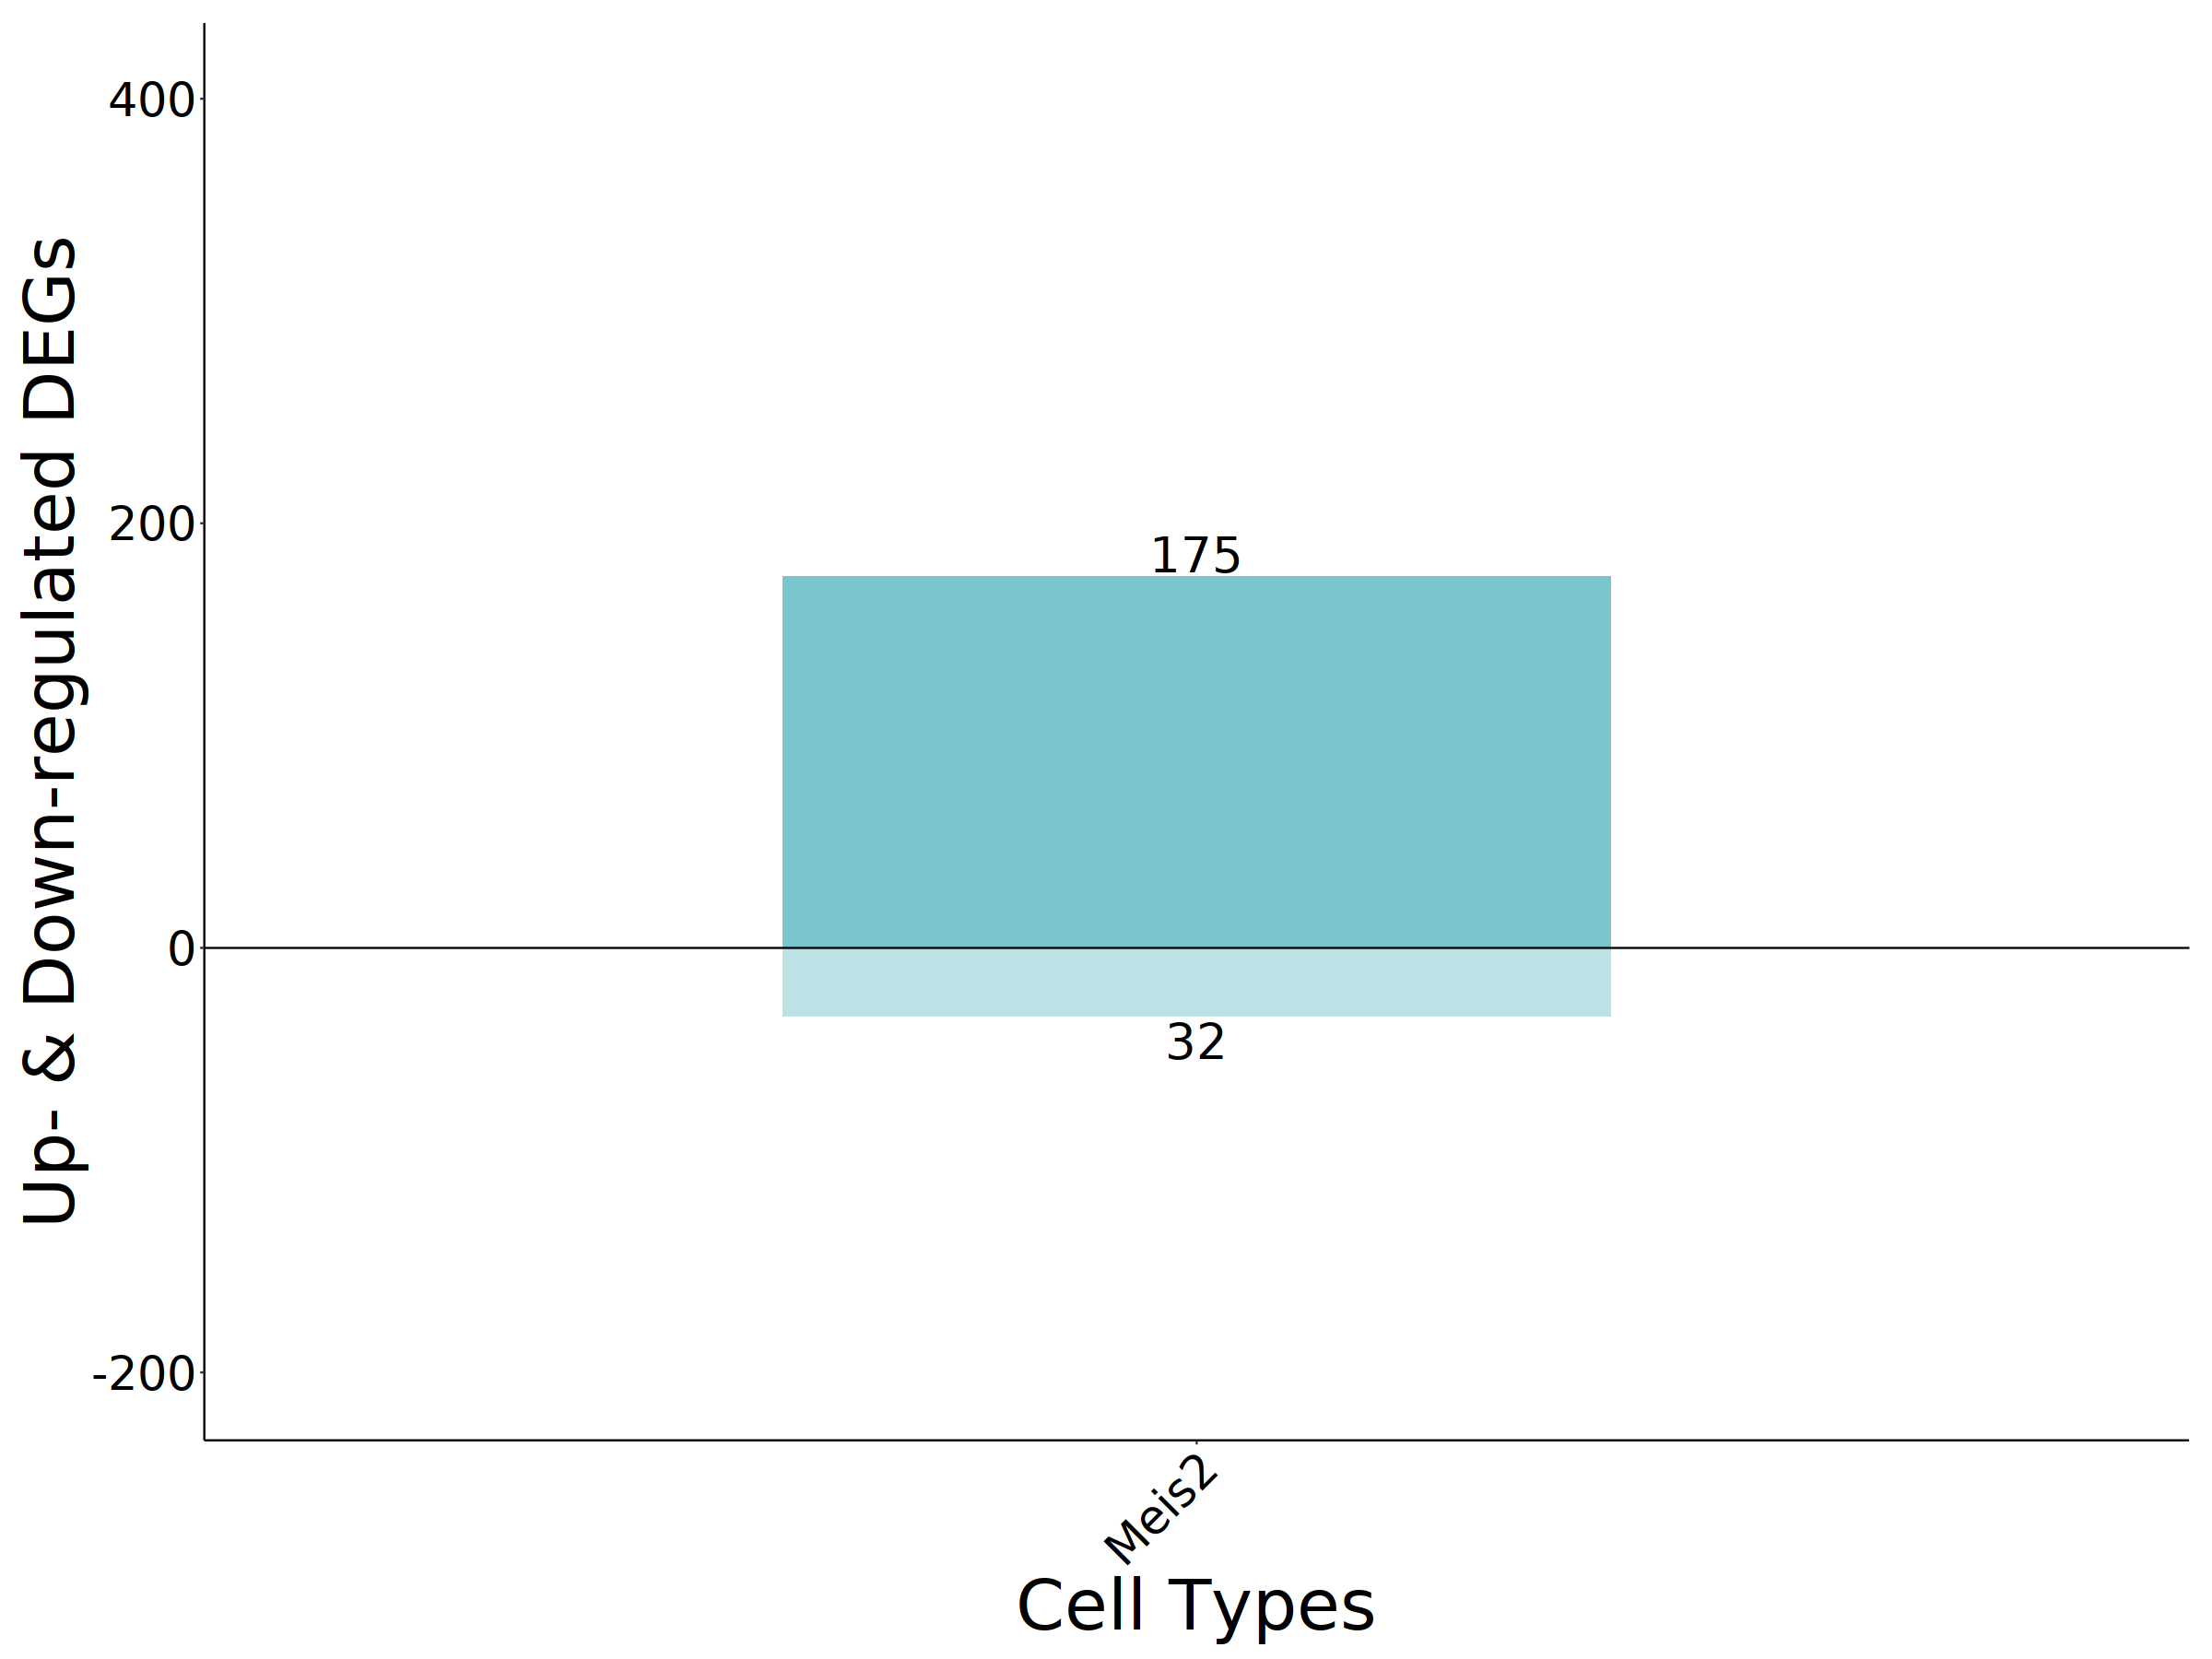

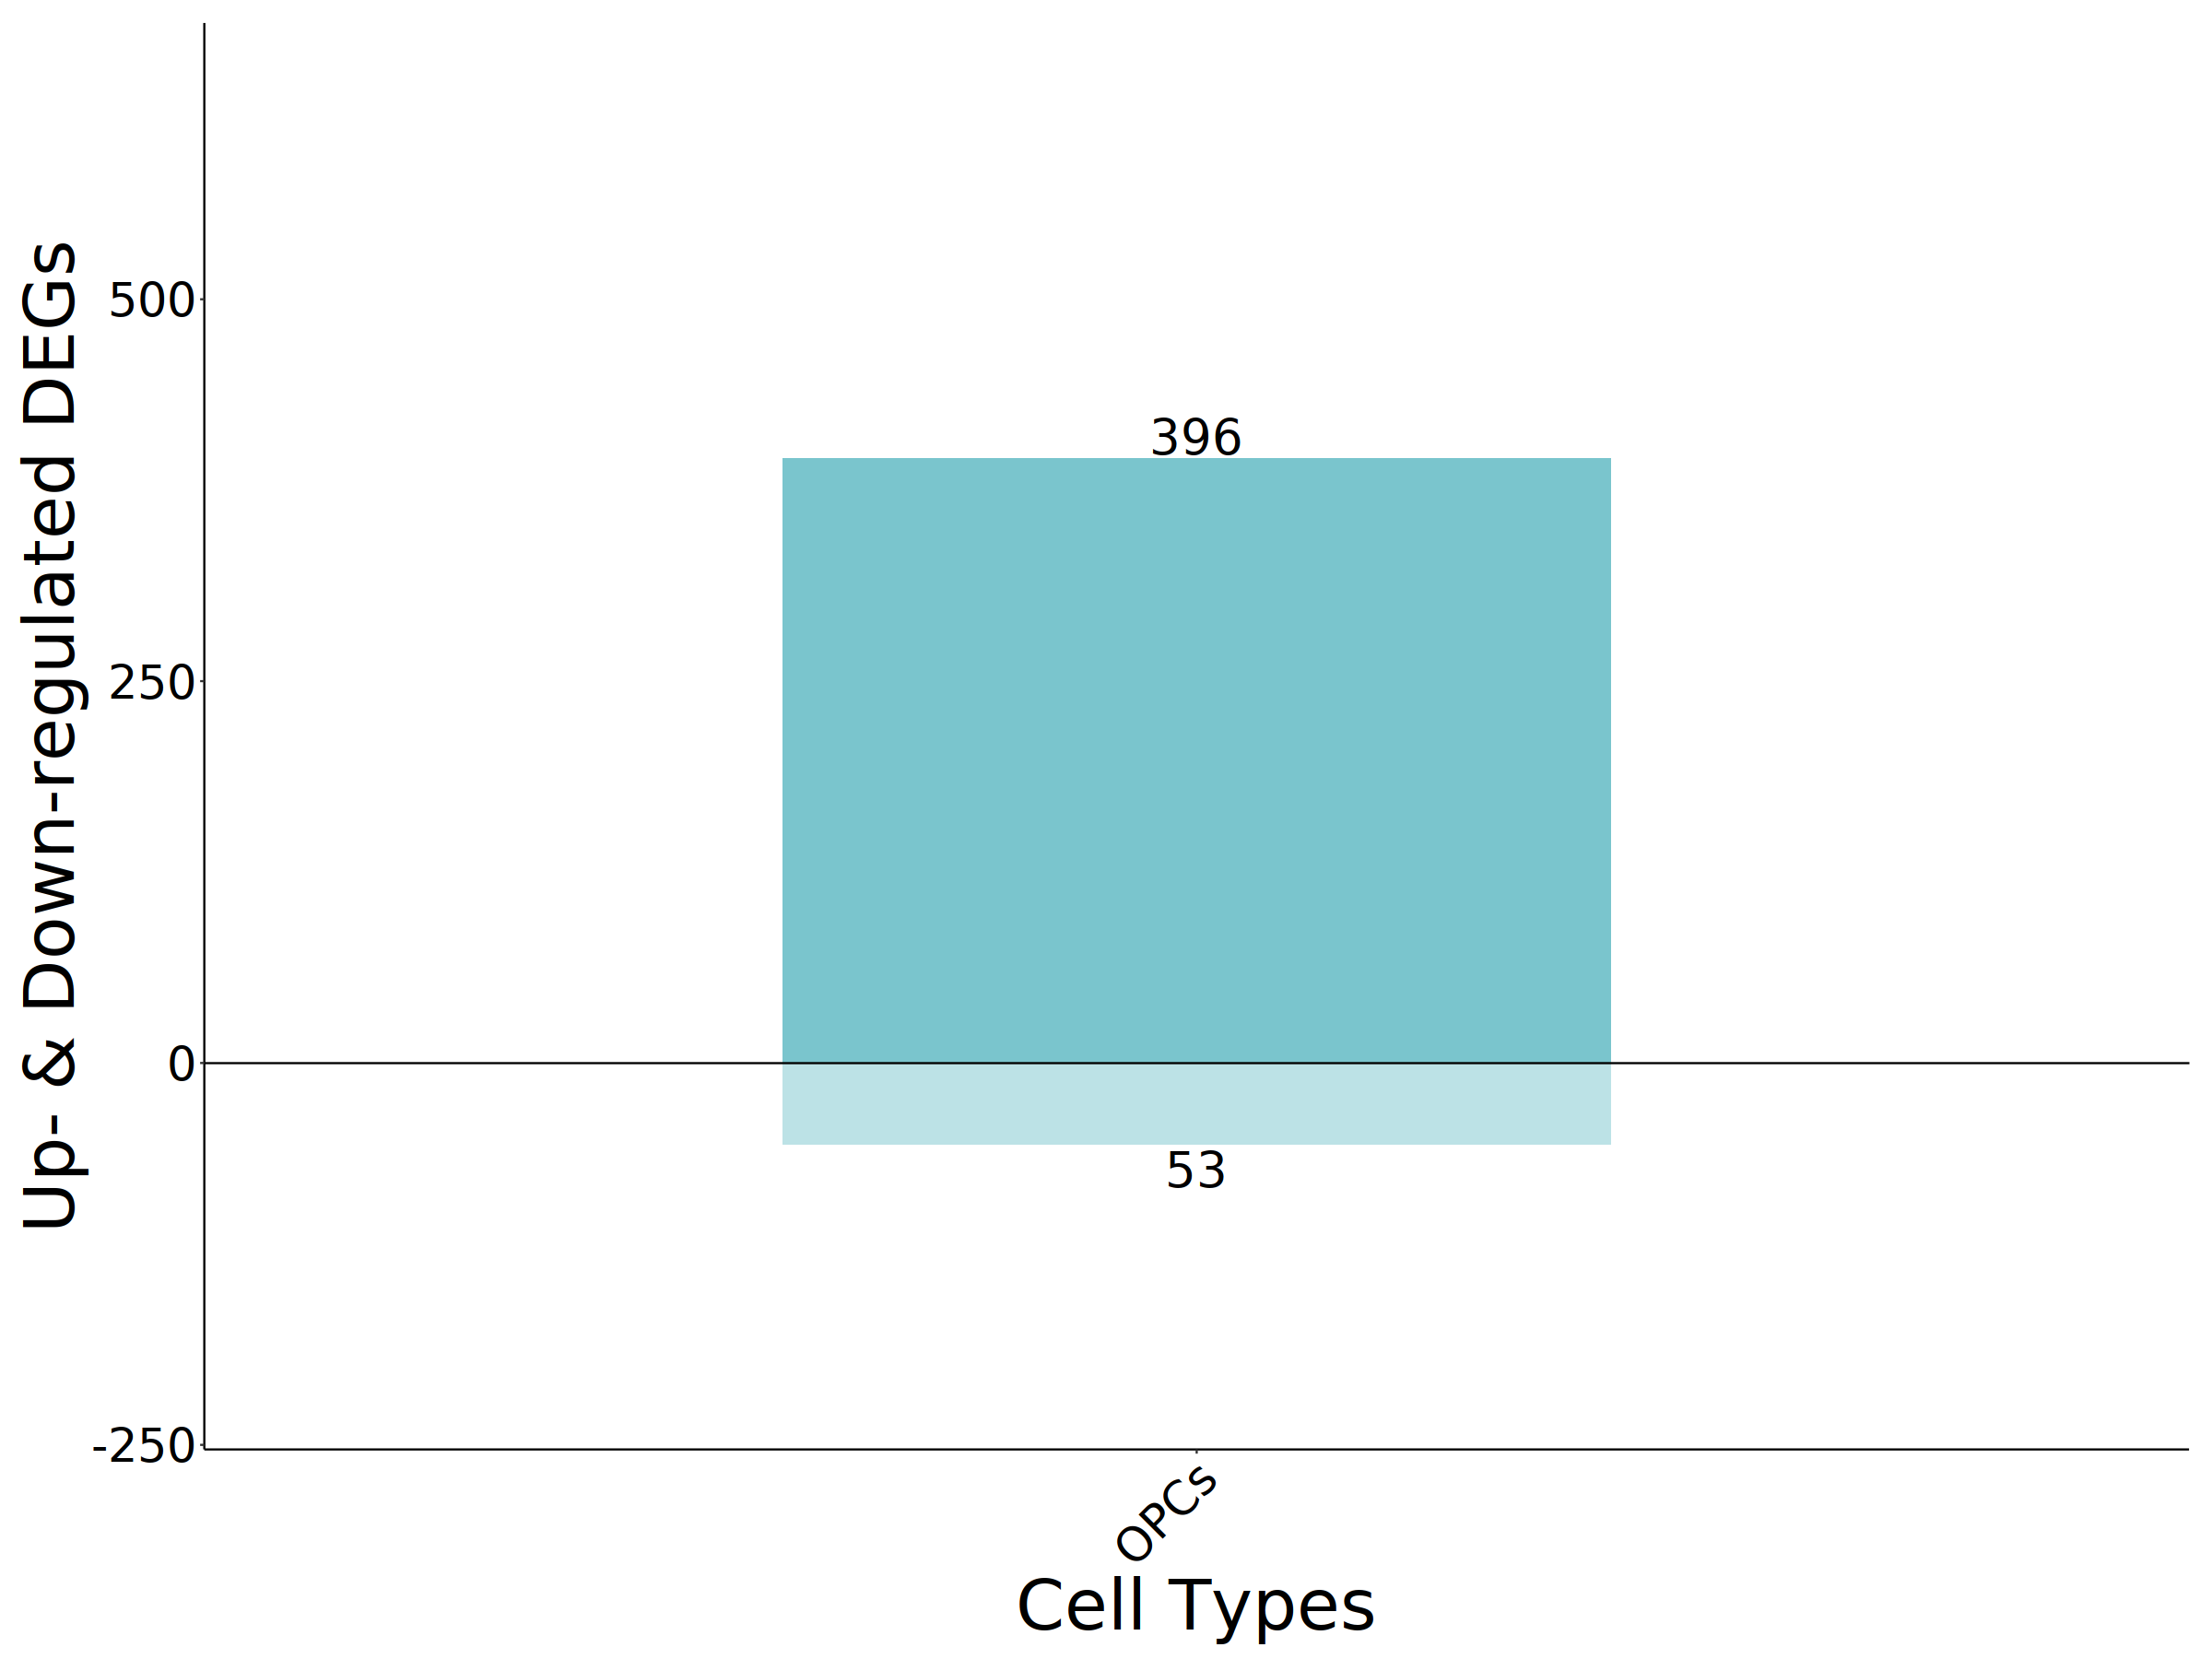

png 
  2

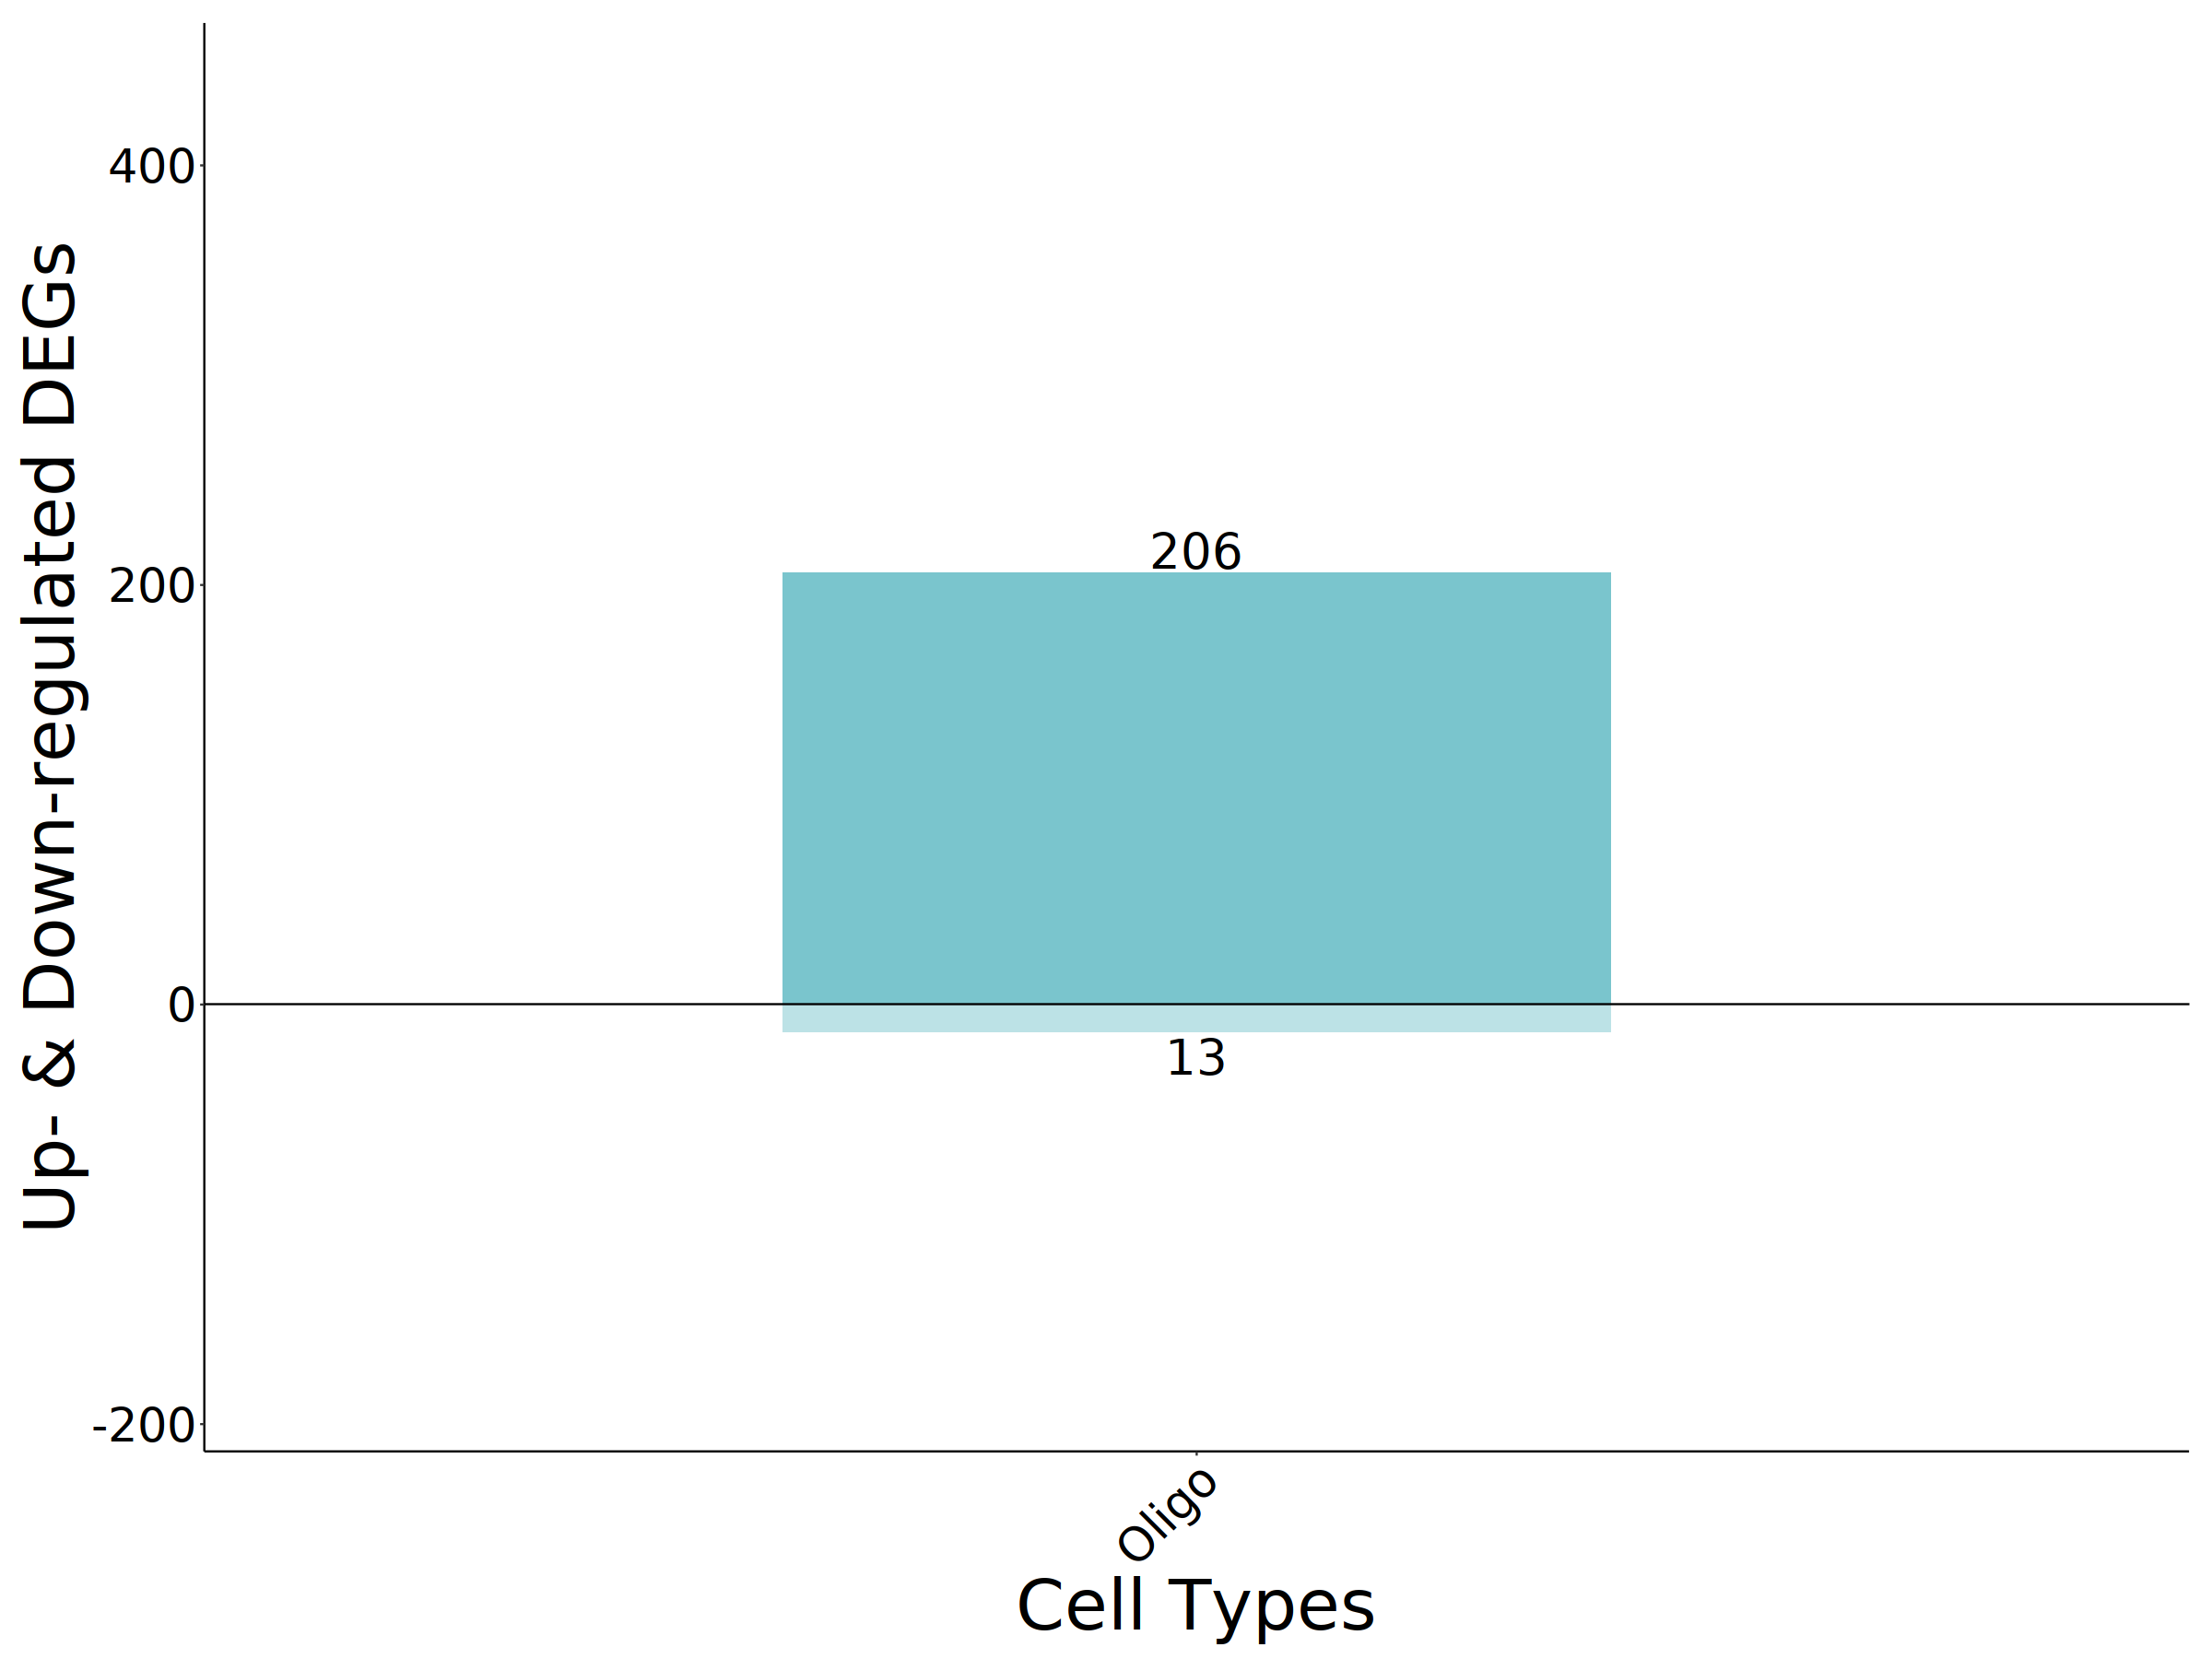

In [112]:
options(repr.plot.width=20, repr.plot.height=15)

plot.list <- list()
for(ct in broad_cts){
    print(ct)
    
    # subset sub-celltypes from each broad CT
    ct_DEGs <- DEG_file[grep(ct, DEG_file$celltype),]
    #print(head(ct_DEGs))
    
    # making dataframe for each broad celltype
    up_down_df <- data.frame()
    up_counts <- c()
    down_counts <- c()

    ct_down <- ct_DEGs[which(ct_DEGs$regulation == "DOWN"),]
    print(ct_down)
    down_counts <- c(down_counts, -ct_down$counts)
    print(down_counts)

    ct_up <- ct_DEGs[which(ct_DEGs$regulation == "UP"),]
    print(ct_up)
    up_counts <- c(up_counts, ct_up$counts)
    print(up_counts)
    
    up_down_df <- data.frame(unique(ct_DEGs$celltype), up_counts, down_counts)
    colnames(up_down_df) <- c("celltypes", "up_deg", "down_deg")
    print(up_down_df)
    
    # renaming non-neural and macrophage
    up_down_df$celltypes[up_down_df$celltypes == 'Non-neuronal'] <- 'OPCs'
    up_down_df$celltypes[up_down_df$celltypes == 'Macrophages'] <- 'Microglia'
    print(up_down_df)

    # plotting for each broad ct
    plotCols <- c("cadetblue3", "coral3", "darkolivegreen3", "darkcyan",
        "mediumpurple1", "lightgreen", "lightgoldenrod", "lightslateblue", 
        "mistyrose", "lightblue4", "navajowhite1", "magenta", 
        "lightsalmon", "mediumorchid1", "midnightblue", "lightskyblue", 
        "lightgoldenrodyellow", "black", "lightgrey", "mistyrose4")
    
    # reordering GABAergic rows
    if(ct == "GABAergic"){
        up_down_df$celltypes <- factor(up_down_df$celltypes, levels = c("GABAergic.1","GABAergic.2","GABAergic.3","GABAergic.4","GABAergic.5","GABAergic.6",
                         "GABAergic.7","GABAergic.8","GABAergic.9","GABAergic.10","GABAergic.11","GABAergic.12",
                         "GABAergic.13","GABAergic.14","GABAergic.15"))
    }
    up_down_df
    
    up.down.Plot <- ggplot(data=up_down_df, aes(x = celltypes, y = up_deg, fill = celltypes)) +
    geom_bar(data=up_down_df, aes(x = celltypes, y = down_deg, fill = celltypes), stat="identity", alpha = 0.5, width = 0.5) +
    geom_col(position = "stack", width = 0.5) + coord_cartesian(ylim = c(min(up_down_df$down_deg)-200, max(up_down_df$up_deg)+200)) +
    scale_fill_manual(values=plotCols) +
    theme_classic() +
    geom_text(aes(label=up_deg), hjust=0.5, vjust=-0.1, size = 11) +
    geom_text(data=up_down_df, aes(x = celltypes, y = down_deg, fill = celltypes, label=-down_deg), hjust=0.5, vjust=1.2, size = 11) +
    xlab("Cell Types") + ylab("Up- & Down-regulated DEGs") +
    theme(plot.title = element_text(size = 50, face = "plain", hjust = 0.5),
          axis.title.x = element_text(size=45, face="plain"),
          axis.title.y = element_text(size=45, face="plain"),
          axis.text.x = element_text(size=30, color="black", angle = 45, hjust = 1),
          axis.text.y = element_text(size=30, color="black"),
          legend.position = "none",
          plot.margin = margin(15,15,10,15)) + # margin(t, r, b, l)
    scale_y_continuous(expand = expansion(mult = c(0, 0.1))) +
    geom_hline(yintercept = 0,colour = "black")
    print(up.down.Plot)
    
    plot.list[[ct]] <- up.down.Plot
}

pdf(paste0(OUTPATH, "DEG_mirrorbarplot.pdf"), width = 15, height = 12)
for(p in plot.list){print(p)}
#do.call("grid.arrange", c(plot.list, ncol=1))
dev.off()

# mirror barplot pt2 - combining the broad CTs that don't have any sub-cts

In [114]:
unique(DEG_file$celltype)

[1] "GABAergic.6"     "Meis2"           "Glutamatergic.1" "GABAergic.2"    
 [5] "Non-neuronal"    "Oligo"           "Macrophages"     "GABAergic.4"    
 [9] "Glutamatergic.2" "GABAergic.1"     "GABAergic.3"     "GABAergic.8"    
[13] "Glutamatergic.3" "GABAergic.7"     "GABAergic.5"     "Glutamatergic.4"
[17] "GABAergic.10"    "GABAergic.9"     "Astrocytes"      "GABAergic.11"   
[21] "GABAergic.14"    "Glutamatergic.5" "GABAergic.12"    "GABAergic.15"   
[25] "GABAergic.13"

       celltype regulation counts
5         Meis2       DOWN     32
14 Non-neuronal       DOWN     53
17        Oligo       DOWN     13
20  Macrophages       DOWN     17
56   Astrocytes       DOWN     48
[1] -32 -53 -13 -17 -48
       celltype regulation counts
4         Meis2         UP    175
13 Non-neuronal         UP    396
16        Oligo         UP    206
19  Macrophages         UP    249
55   Astrocytes         UP    481
[1] 175 396 206 249 481
     celltypes up_deg down_deg
1        Meis2    175      -32
2 Non-neuronal    396      -53
3        Oligo    206      -13
4  Macrophages    249      -17
5   Astrocytes    481      -48
   celltypes up_deg down_deg
1      Meis2    175      -32
2       OPCs    396      -53
3      Oligo    206      -13
4  Microglia    249      -17
5 Astrocytes    481      -48


celltypes  up_deg down_deg
1 Meis2      175    -32     
2 OPCs       396    -53     
3 Oligo      206    -13     
4 Microglia  249    -17     
5 Astrocytes 481    -48

Warning message in geom_text(data = up_down_df, aes(x = celltypes, y = down_deg, :
“Ignoring unknown aesthetics: fill”


png 
  2

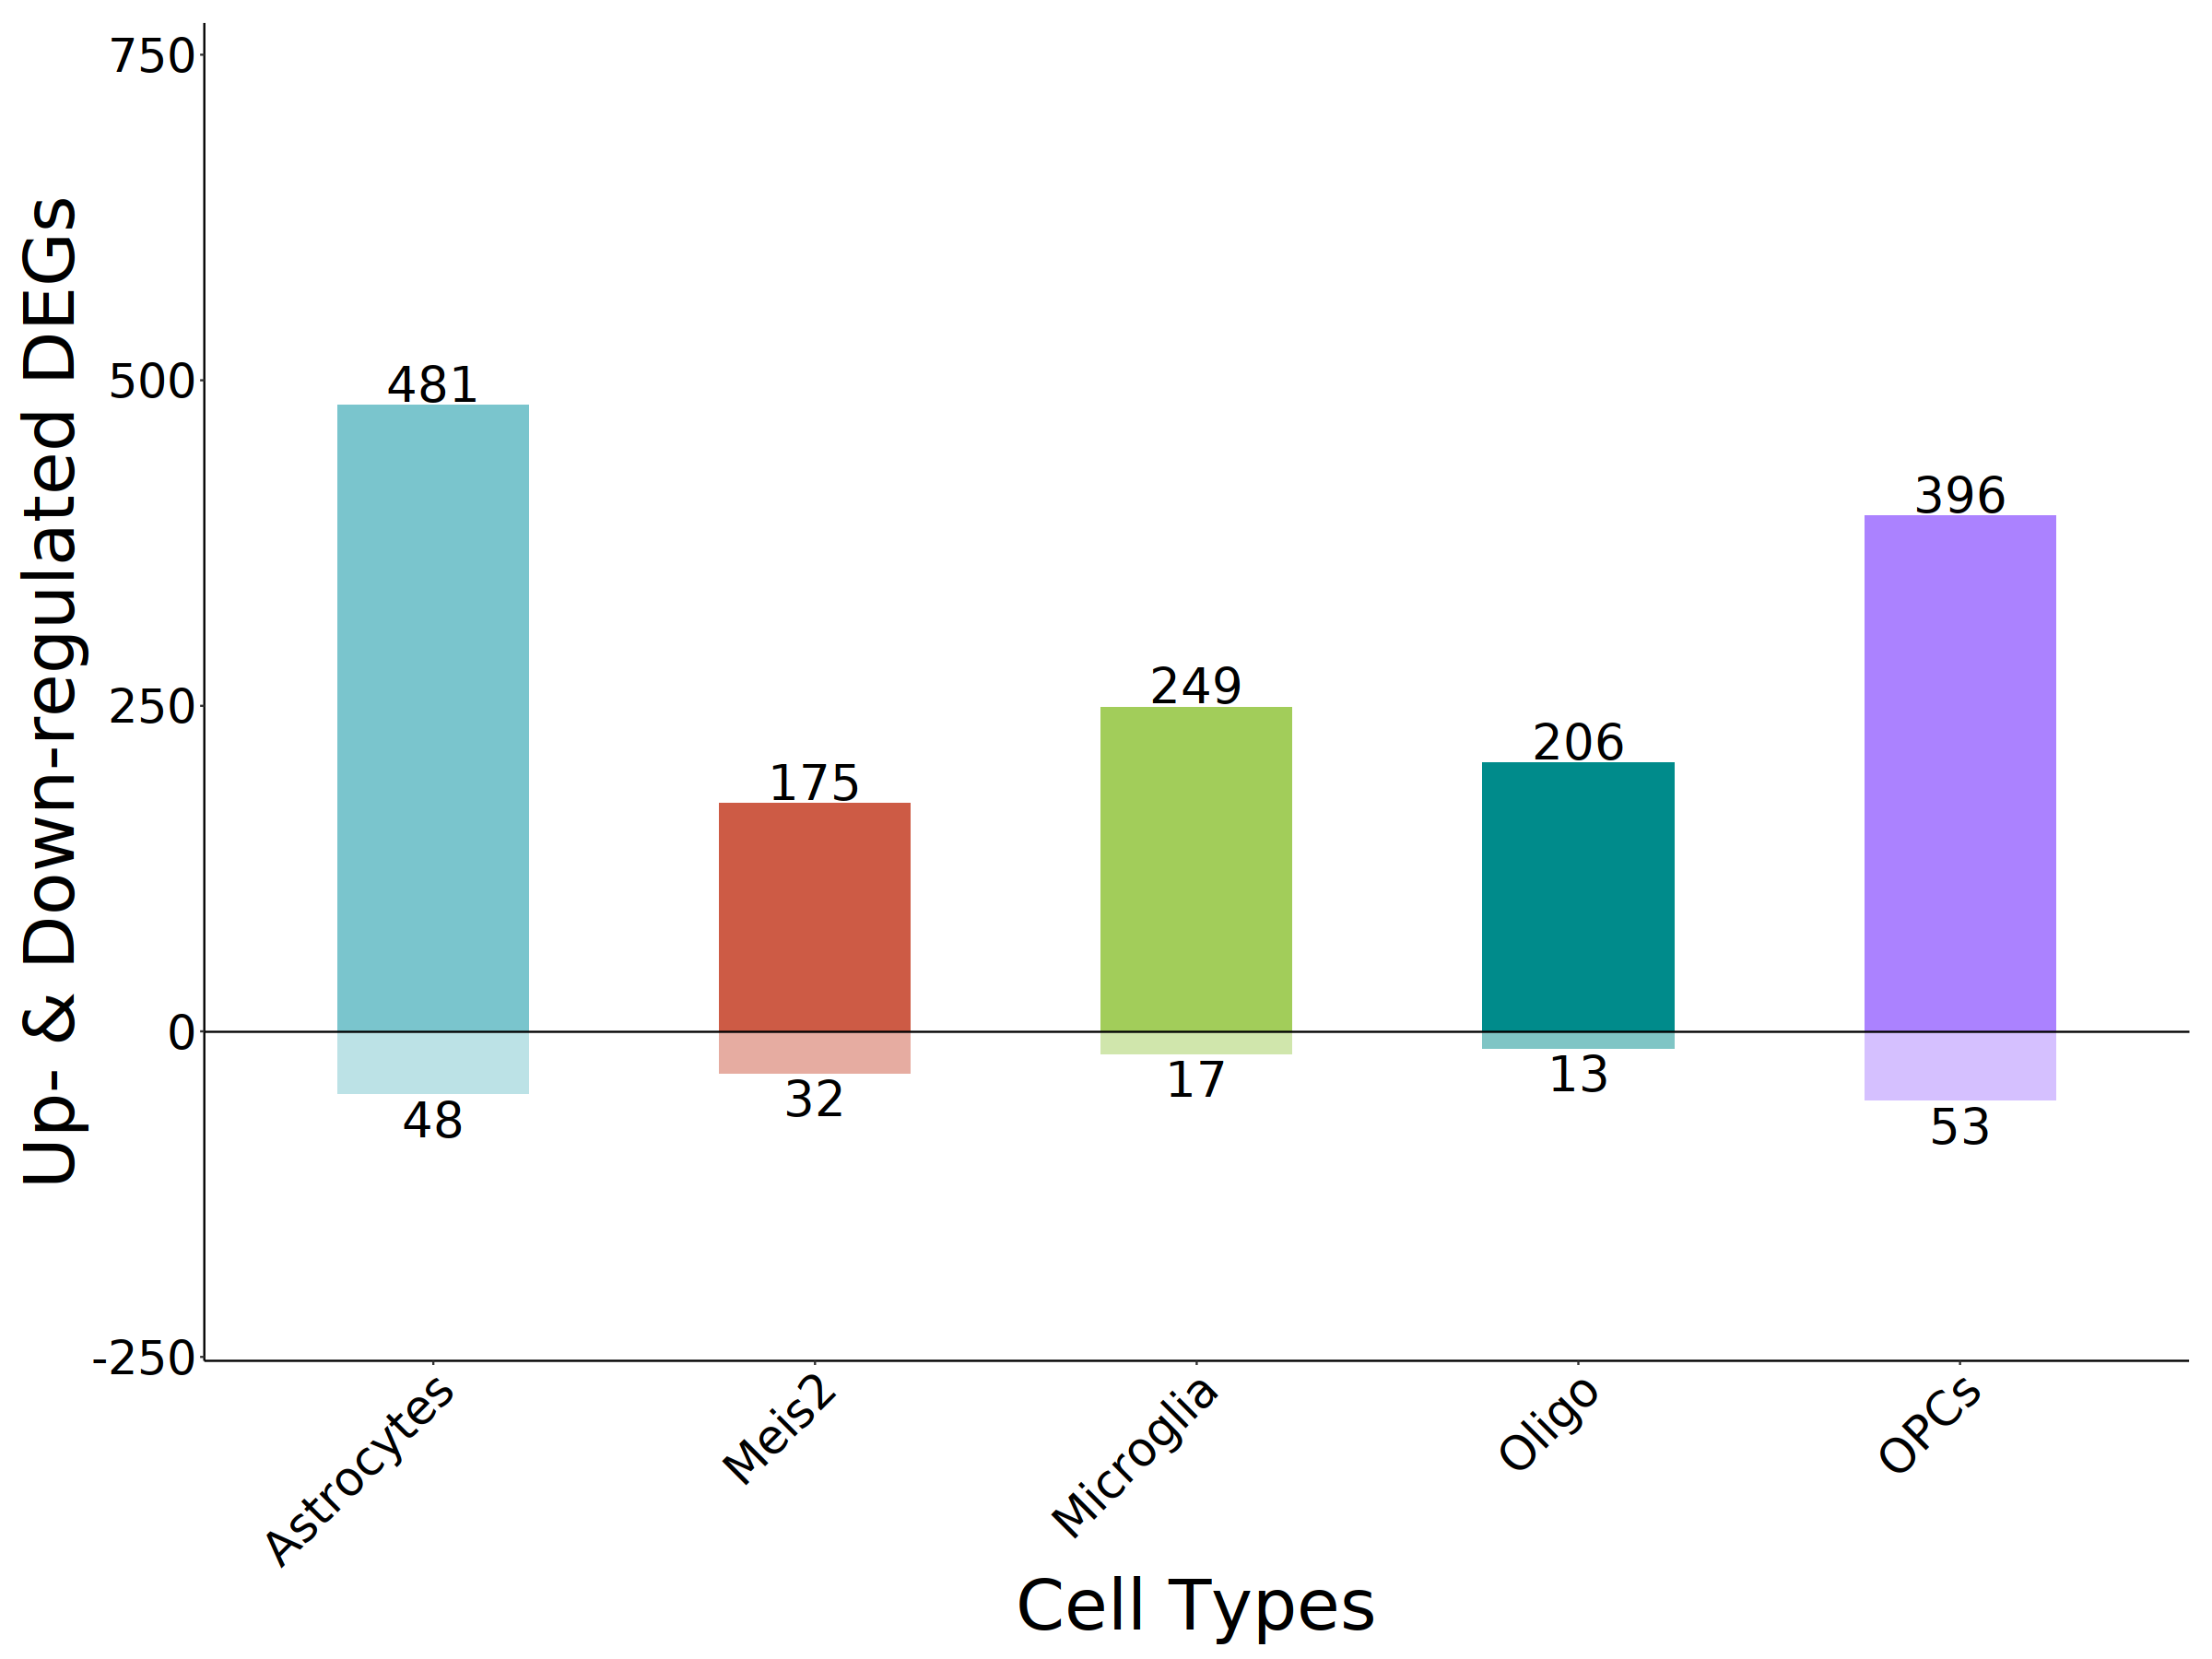

In [118]:
options(repr.plot.width=20, repr.plot.height=15)

plot.list2 <- list()

# subset sub-celltypes from each broad CT
ct_DEGs <- DEG_file[which(DEG_file$celltype %in% c("Meis2","Oligo","Non-neuronal","Macrophages","Astrocytes")),]
#print(head(ct_DEGs))

# making dataframe for each broad celltype
up_down_df <- data.frame()
up_counts <- c()
down_counts <- c()

ct_down <- ct_DEGs[which(ct_DEGs$regulation == "DOWN"),]
print(ct_down)
down_counts <- c(down_counts, -ct_down$counts)
print(down_counts)

ct_up <- ct_DEGs[which(ct_DEGs$regulation == "UP"),]
print(ct_up)
up_counts <- c(up_counts, ct_up$counts)
print(up_counts)

up_down_df <- data.frame(unique(ct_DEGs$celltype), up_counts, down_counts)
colnames(up_down_df) <- c("celltypes", "up_deg", "down_deg")
print(up_down_df)

# renaming non-neural and macrophage
up_down_df$celltypes[up_down_df$celltypes == 'Non-neuronal'] <- 'OPCs'
up_down_df$celltypes[up_down_df$celltypes == 'Macrophages'] <- 'Microglia'
print(up_down_df)

# plotting for each broad ct
plotCols <- c("cadetblue3", "coral3", "darkolivegreen3", "darkcyan",
    "mediumpurple1", "lightgreen", "lightgoldenrod", "lightslateblue", 
    "mistyrose", "lightblue4", "navajowhite1", "magenta", 
    "lightsalmon", "mediumorchid1", "midnightblue", "lightskyblue", 
    "lightgoldenrodyellow", "black", "lightgrey", "mistyrose4")

# reordering GABAergic rows
if(ct == "GABAergic"){
    up_down_df$celltypes <- factor(up_down_df$celltypes, levels = c("GABAergic.1","GABAergic.2","GABAergic.3","GABAergic.4","GABAergic.5","GABAergic.6",
                     "GABAergic.7","GABAergic.8","GABAergic.9","GABAergic.10","GABAergic.11","GABAergic.12",
                     "GABAergic.13","GABAergic.14","GABAergic.15"))
}
up_down_df

up.down.Plot <- ggplot(data=up_down_df, aes(x = celltypes, y = up_deg, fill = celltypes)) +
geom_bar(data=up_down_df, aes(x = celltypes, y = down_deg, fill = celltypes), stat="identity", alpha = 0.5, width = 0.5) +
geom_col(position = "stack", width = 0.5) + coord_cartesian(ylim = c(min(up_down_df$down_deg)-200, max(up_down_df$up_deg)+200)) +
scale_fill_manual(values=plotCols) +
theme_classic() +
geom_text(aes(label=up_deg), hjust=0.5, vjust=-0.1, size = 11) +
geom_text(data=up_down_df, aes(x = celltypes, y = down_deg, fill = celltypes, label=-down_deg), hjust=0.5, vjust=1.2, size = 11) +
xlab("Cell Types") + ylab("Up- & Down-regulated DEGs") +
theme(plot.title = element_text(size = 50, face = "plain", hjust = 0.5),
      axis.title.x = element_text(size=45, face="plain"),
      axis.title.y = element_text(size=45, face="plain"),
      axis.text.x = element_text(size=30, color="black", angle = 45, hjust = 1),
      axis.text.y = element_text(size=30, color="black"),
      legend.position = "none",
      plot.margin = margin(15,15,10,15)) + # margin(t, r, b, l)
scale_y_continuous(expand = expansion(mult = c(0, 0.1))) +
geom_hline(yintercept = 0,colour = "black")
print(up.down.Plot)

plot.list2[[ct]] <- up.down.Plot

pdf(paste0(OUTPATH, "DEG_mirrorbarplot_combined.pdf"), width = 15, height = 12)
for(p in plot.list2){print(p)}
#do.call("grid.arrange", c(plot.list, ncol=1))
dev.off()

# volcano plot
3 plots total: GABA, Gluta, everything else

In [125]:
gaba_DEGs <- list.files(paste0(DATA, "sub_ct/"), pattern = "GABA", full.names = T)
gaba_DEGs

[1] "/projects/ps-epigen/users/cmiciano/ASAP_Aaron/outputs/find_marks/230613/default_thres/sub_ct//GABAergic.1.txt" 
 [2] "/projects/ps-epigen/users/cmiciano/ASAP_Aaron/outputs/find_marks/230613/default_thres/sub_ct//GABAergic.10.txt"
 [3] "/projects/ps-epigen/users/cmiciano/ASAP_Aaron/outputs/find_marks/230613/default_thres/sub_ct//GABAergic.11.txt"
 [4] "/projects/ps-epigen/users/cmiciano/ASAP_Aaron/outputs/find_marks/230613/default_thres/sub_ct//GABAergic.12.txt"
 [5] "/projects/ps-epigen/users/cmiciano/ASAP_Aaron/outputs/find_marks/230613/default_thres/sub_ct//GABAergic.13.txt"
 [6] "/projects/ps-epigen/users/cmiciano/ASAP_Aaron/outputs/find_marks/230613/default_thres/sub_ct//GABAergic.14.txt"
 [7] "/projects/ps-epigen/users/cmiciano/ASAP_Aaron/outputs/find_marks/230613/default_thres/sub_ct//GABAergic.15.txt"
 [8] "/projects/ps-epigen/users/cmiciano/ASAP_Aaron/outputs/find_marks/230613/default_thres/sub_ct//GABAergic.2.txt" 
 [9] "/projects/ps-epigen/users/cmiciano/ASAP_Aaron/outputs/find_marks/230613/default_thres/sub_ct//GABAergic.3.txt" 
[10] "/projects/ps-epigen/users/cmiciano/ASAP_Aaron/outputs/find_marks/230613/default_thres/sub_ct//GABAergic.4.txt" 
[11] "/projects/ps-epigen/users/cmiciano/ASAP_Aaron/outputs/find_marks/230613/default_thres/sub_ct//GABAergic.5.txt" 
[12] "/projects/ps-epigen/users/cmiciano/ASAP_Aaron/outputs/find_marks/230613/default_thres/sub_ct//GABAergic.6.txt" 
[13] "/projects/ps-epigen/users/cmiciano/ASAP_Aaron/outputs/find_marks/230613/default_thres/sub_ct//GABAergic.7.txt" 
[14] "/projects/ps-epigen/users/cmiciano/ASAP_Aaron/outputs/find_marks/230613/default_thres/sub_ct//GABAergic.8.txt" 
[15] "/projects/ps-epigen/users/cmiciano/ASAP_Aaron/outputs/find_marks/230613/default_thres/sub_ct//GABAergic.9.txt"

In [126]:
testing <- read.table('/projects/ps-epigen/users/cmiciano/ASAP_Aaron/outputs/find_marks/230613/default_thres/sub_ct//GABAergic.1.txt')
head(testing)

p_val         avg_log2FC pct.1 pct.2 p_val_adj    
Ube3a    1.250787e-236 -1.1787724 0.905 0.988 2.918087e-232
Malat1   1.571203e-233 -0.9431463 1.000 1.000 3.665615e-229
AY036118 1.085238e-222 -1.1566483 0.908 0.990 2.531860e-218
Meg3     2.586236e-201  0.7045479 1.000 1.000 6.033688e-197
Atp6v0b  2.757750e-163 -0.9556613 0.710 0.933 6.433830e-159
Kcnq1ot1 2.187058e-129  0.6613646 1.000 0.961 5.102405e-125

[1] "GABAergic.1"
[1] "GABAergic.10"
[1] "GABAergic.11"
[1] "GABAergic.12"
[1] "GABAergic.13"
[1] "GABAergic.14"
[1] "GABAergic.15"
[1] "GABAergic.2"
[1] "GABAergic.3"
[1] "GABAergic.4"
[1] "GABAergic.5"
[1] "GABAergic.6"
[1] "GABAergic.7"
[1] "GABAergic.8"
[1] "GABAergic.9"
[1] 9431    6


p_val         avg_log2FC pct.1 pct.2 p_val_adj     celltype   
Ube3a    1.250787e-236 -1.1787724 0.905 0.988 2.918087e-232 GABAergic.1
Malat1   1.571203e-233 -0.9431463 1.000 1.000 3.665615e-229 GABAergic.1
AY036118 1.085238e-222 -1.1566483 0.908 0.990 2.531860e-218 GABAergic.1
Meg3     2.586236e-201  0.7045479 1.000 1.000 6.033688e-197 GABAergic.1
Atp6v0b  2.757750e-163 -0.9556613 0.710 0.933 6.433830e-159 GABAergic.1
Kcnq1ot1 2.187058e-129  0.6613646 1.000 0.961 5.102405e-125 GABAergic.1
         diffexpressed
Ube3a    DE           
Malat1   DE           
AY036118 DE           
Meg3     DE           
Atp6v0b  DE           
Kcnq1ot1 DE

png 
  2

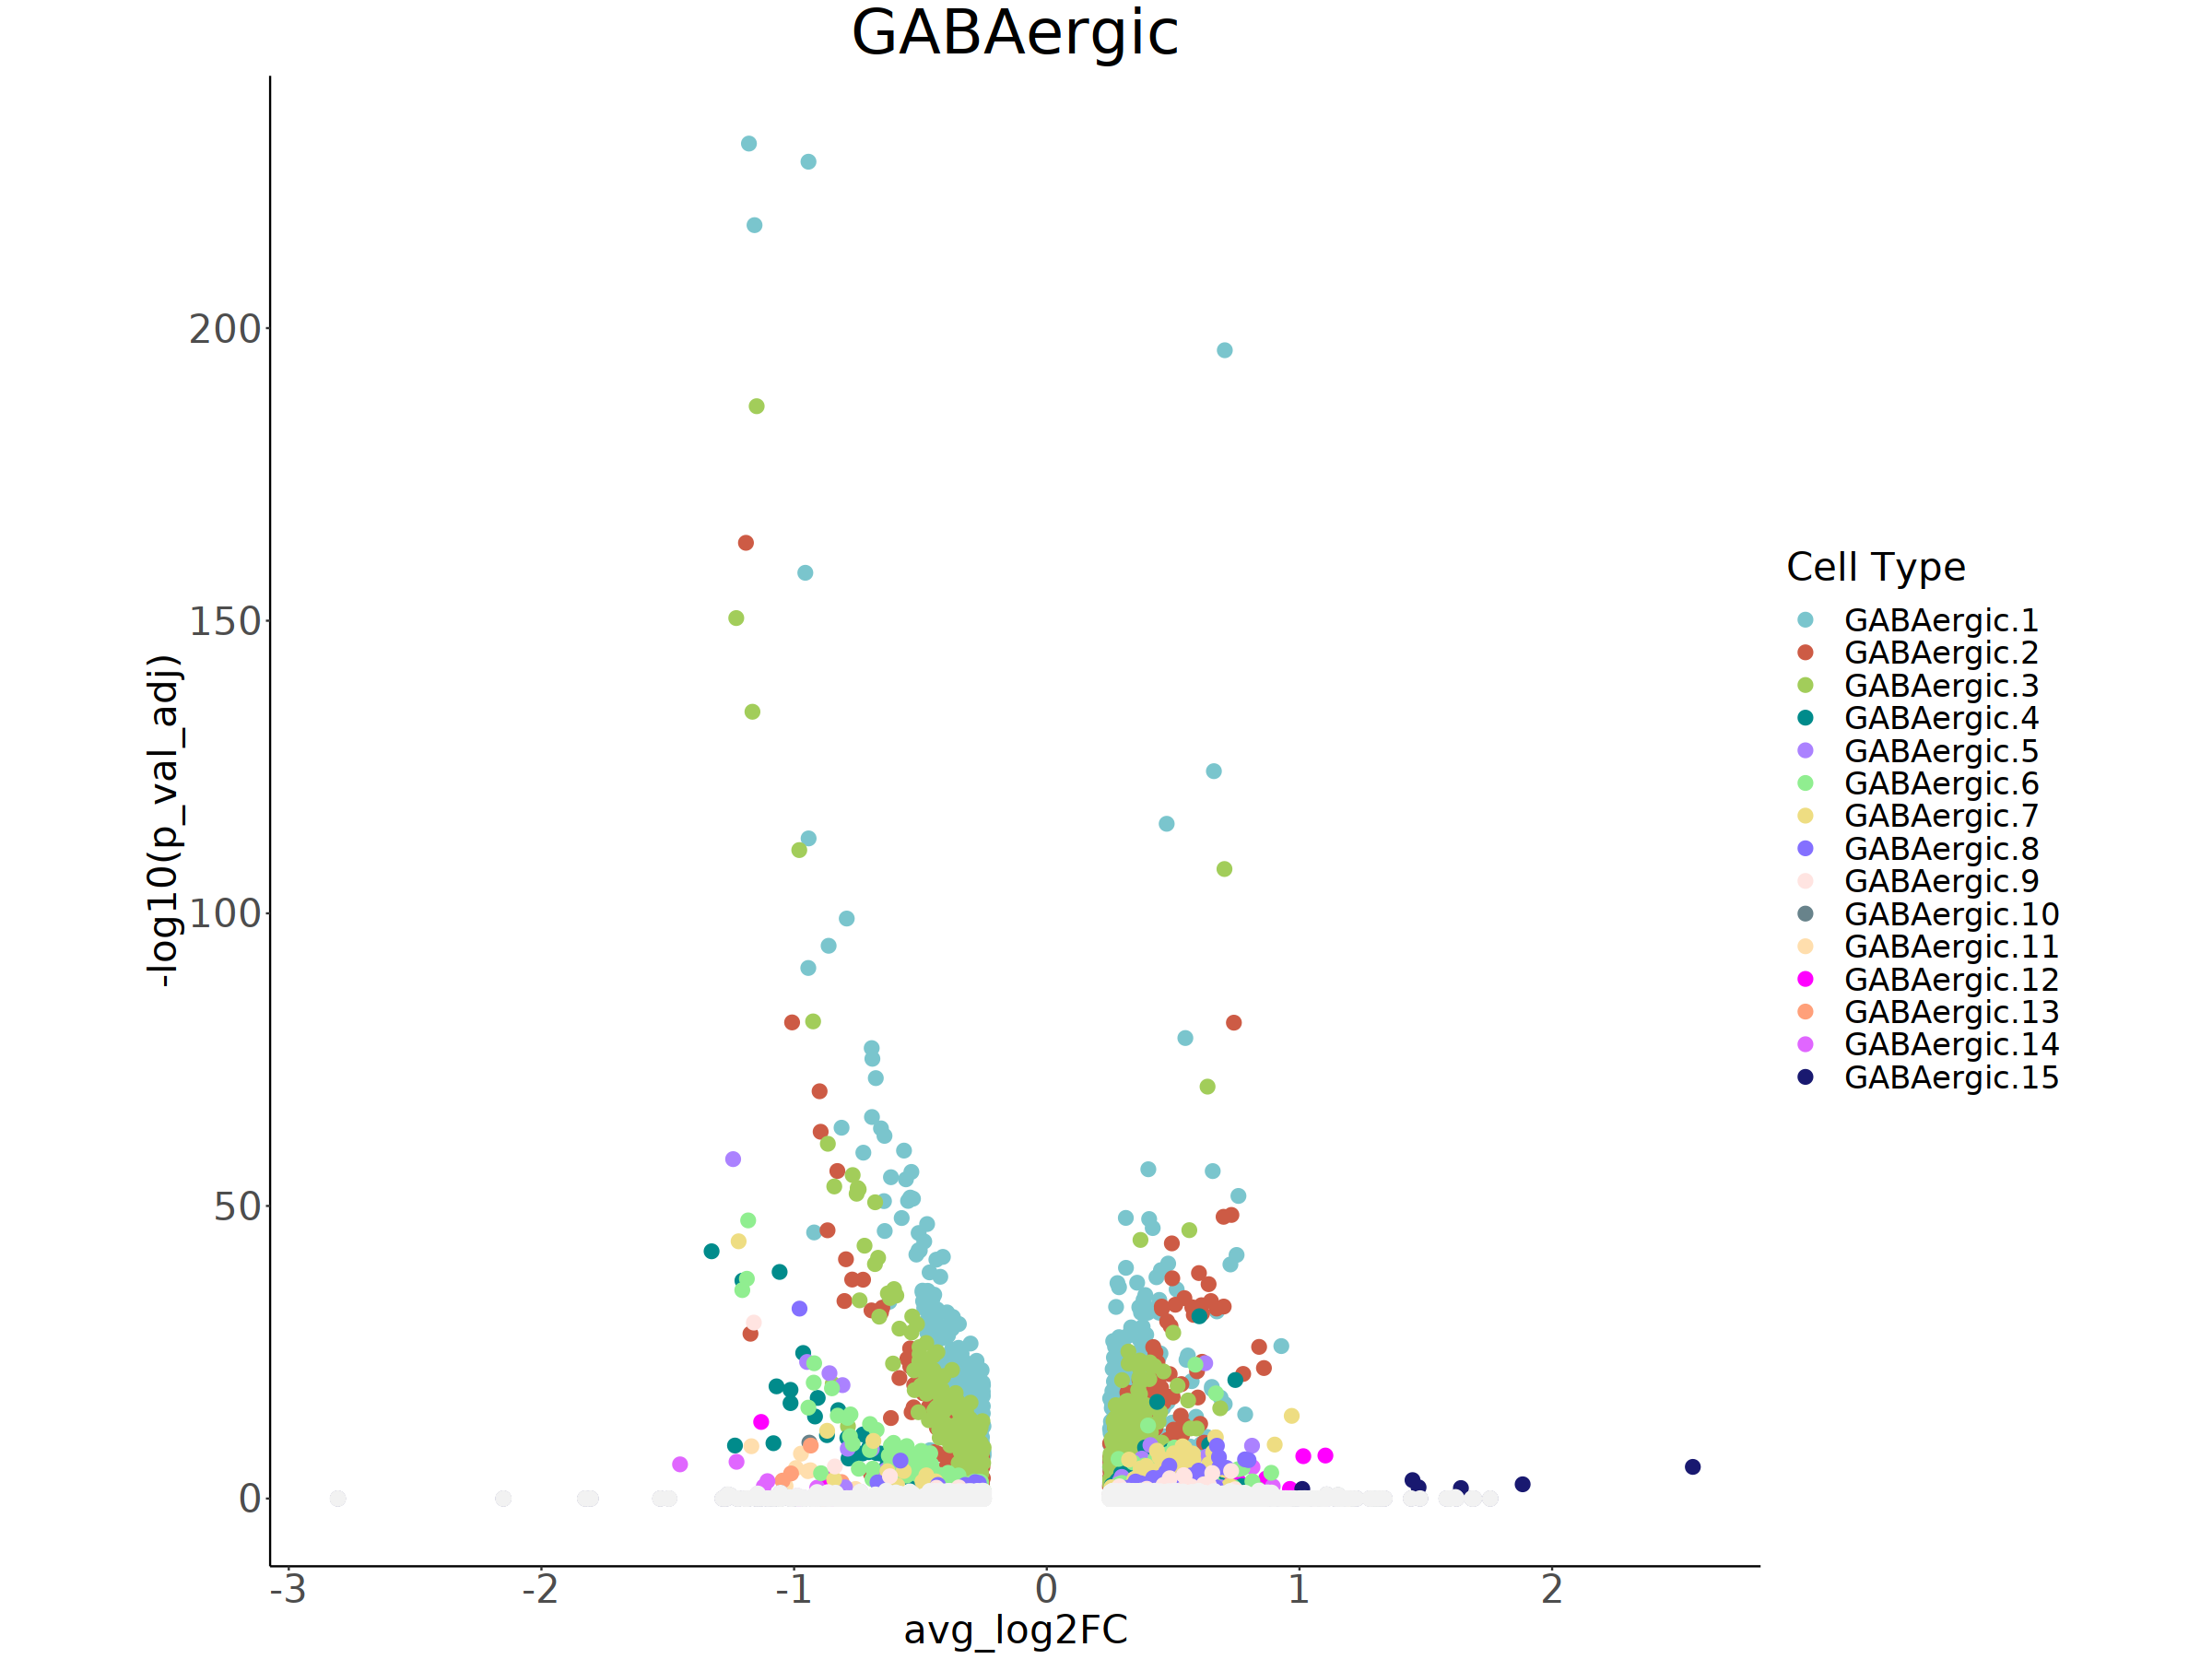

In [148]:
big_mtx <- c()
for(file in gaba_DEGs){
    celltype <- gsub(".txt","",str_split(file, pattern = "//")[[1]][2])
    print(celltype)
    
    ct_file <- read.table(file)
    ct_file[["celltype"]] <- celltype
    big_mtx <- rbind(big_mtx, ct_file)
}
print(dim(big_mtx))

# adding DE column
big_mtx$diffexpressed <- "NO"
big_mtx$diffexpressed[which((big_mtx$avg_log2FC > 0.25 | big_mtx$avg_log2FC < -0.25) & (big_mtx$p_val_adj < 0.05))] <- "DE"

head(big_mtx)

plot_colors <- c("cadetblue3", "coral3", "darkolivegreen3", "darkcyan",
    "mediumpurple1", "lightgreen", "lightgoldenrod", "lightslateblue", 
    "mistyrose", "lightblue4", "navajowhite1", "magenta", 
    "lightsalmon", "mediumorchid1", "midnightblue", "lightskyblue", 
    "lightgoldenrodyellow", "black", "lightgrey", "mistyrose4")

big_mtx$celltype <- factor(big_mtx$celltype, levels = c("GABAergic.1","GABAergic.2","GABAergic.3","GABAergic.4","GABAergic.5","GABAergic.6",
                 "GABAergic.7","GABAergic.8","GABAergic.9","GABAergic.10","GABAergic.11","GABAergic.12",
                 "GABAergic.13","GABAergic.14","GABAergic.15"))

gplot <- ggplot(data=big_mtx, aes(x=avg_log2FC, y=-log10(p_val_adj), col = celltype)) +
        geom_point(size = 3.8) + theme_classic() +
        ggtitle("GABAergic") + scale_color_manual("Cell Type", values=plot_colors) +
        theme(plot.title = element_text(color="black", size=40, hjust=0.5),
                axis.title.y = element_text(size = 25),
                axis.title.x = element_text(size = 25),
                axis.text = element_text(size = 25),
                #legend.position = "none") +
                legend.title = element_text(size = 25),
                legend.text = element_text(size = 20),
                legend.key.width = unit(0.9, "cm"),
                legend.key.height = unit(0.75, "cm")) + 
        theme(aspect.ratio = 1) +
        geom_point(data=big_mtx[(big_mtx$diffexpressed == "NO"),], aes(x=avg_log2FC, y=-log10(p_val_adj)), col = "gray95", size = 4) +
        guides(col = guide_legend(ncol = 1))
gplot

pdf(paste0(OUTPATH, "GABA_volcano.pdf"), width = 12, height = 10)
gplot
dev.off()




In [150]:
gluta_DEGs <- list.files(paste0(DATA, "sub_ct/"), pattern = "Glutamatergic", full.names = T)
gluta_DEGs

[1] "/projects/ps-epigen/users/cmiciano/ASAP_Aaron/outputs/find_marks/230613/default_thres/sub_ct//Glutamatergic.1.txt"
[2] "/projects/ps-epigen/users/cmiciano/ASAP_Aaron/outputs/find_marks/230613/default_thres/sub_ct//Glutamatergic.2.txt"
[3] "/projects/ps-epigen/users/cmiciano/ASAP_Aaron/outputs/find_marks/230613/default_thres/sub_ct//Glutamatergic.3.txt"
[4] "/projects/ps-epigen/users/cmiciano/ASAP_Aaron/outputs/find_marks/230613/default_thres/sub_ct//Glutamatergic.4.txt"
[5] "/projects/ps-epigen/users/cmiciano/ASAP_Aaron/outputs/find_marks/230613/default_thres/sub_ct//Glutamatergic.5.txt"

[1] "Glutamatergic.1"
[1] "Glutamatergic.2"
[1] "Glutamatergic.3"
[1] "Glutamatergic.4"
[1] "Glutamatergic.5"
[1] 4540    6


p_val         avg_log2FC pct.1 pct.2 p_val_adj     celltype       
Malat1   7.220629e-200 -1.087393  1.000 1.000 1.684573e-195 Glutamatergic.1
Ube3a    2.206559e-189 -1.347811  0.960 0.998 5.147902e-185 Glutamatergic.1
Nrg3os   1.309095e-165 -1.469942  0.360 0.904 3.054119e-161 Glutamatergic.1
Gm20642  5.985421e-157 -1.366354  0.247 0.838 1.396399e-152 Glutamatergic.1
AY036118 6.094492e-156 -1.147903  0.956 0.996 1.421845e-151 Glutamatergic.1
Atp6v0b  1.787607e-139 -1.003257  0.883 0.988 4.170487e-135 Glutamatergic.1
         diffexpressed
Malat1   DE           
Ube3a    DE           
Nrg3os   DE           
Gm20642  DE           
AY036118 DE           
Atp6v0b  DE

png 
  2

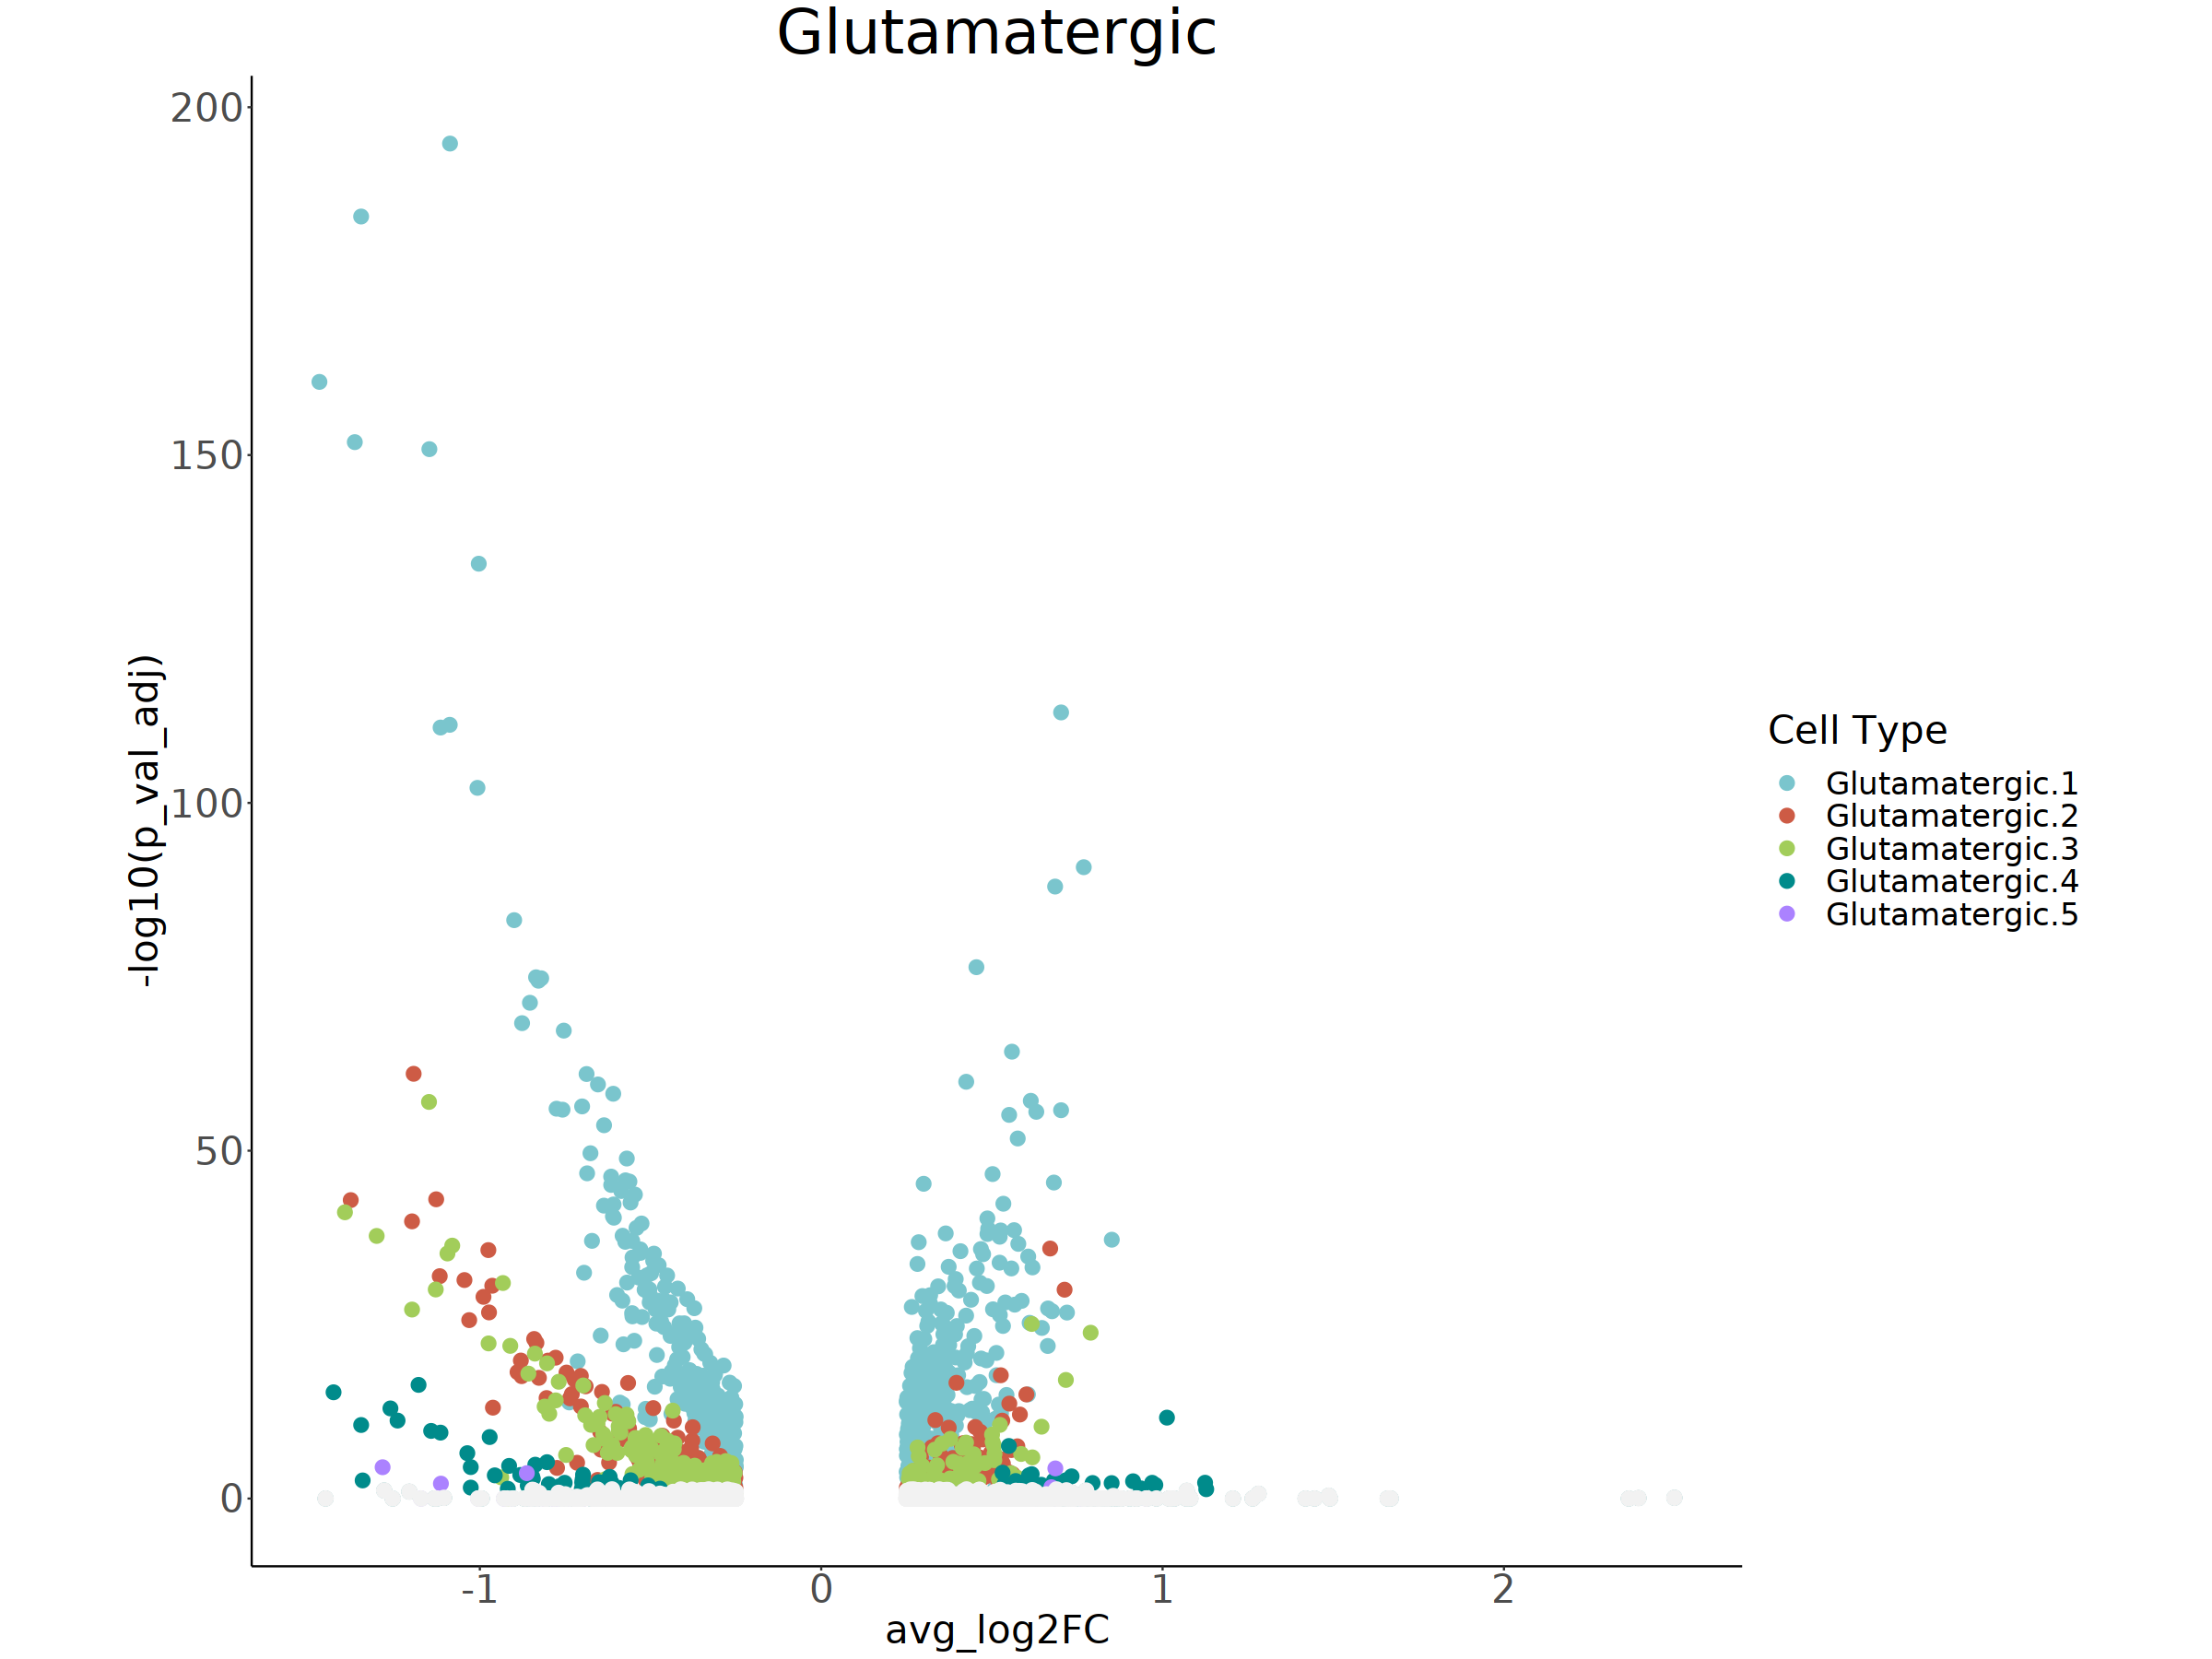

In [152]:
big_mtx <- c()
for(file in gluta_DEGs){
    celltype <- gsub(".txt","",str_split(file, pattern = "//")[[1]][2])
    print(celltype)
    
    ct_file <- read.table(file)
    ct_file[["celltype"]] <- celltype
    big_mtx <- rbind(big_mtx, ct_file)
}
print(dim(big_mtx))

# adding DE column
big_mtx$diffexpressed <- "NO"
big_mtx$diffexpressed[which((big_mtx$avg_log2FC > 0.25 | big_mtx$avg_log2FC < -0.25) & (big_mtx$p_val_adj < 0.05))] <- "DE"

head(big_mtx)

plot_colors <- c("cadetblue3", "coral3", "darkolivegreen3", "darkcyan",
    "mediumpurple1", "lightgreen", "lightgoldenrod", "lightslateblue", 
    "mistyrose", "lightblue4", "navajowhite1", "magenta", 
    "lightsalmon", "mediumorchid1", "midnightblue", "lightskyblue", 
    "lightgoldenrodyellow", "black", "lightgrey", "mistyrose4")

#big_mtx$celltype <- factor(big_mtx$celltype, levels = c("GABAergic.1","GABAergic.2","GABAergic.3","GABAergic.4","GABAergic.5","GABAergic.6",
#                 "GABAergic.7","GABAergic.8","GABAergic.9","GABAergic.10","GABAergic.11","GABAergic.12",
#                 "GABAergic.13","GABAergic.14","GABAergic.15"))

gplot <- ggplot(data=big_mtx, aes(x=avg_log2FC, y=-log10(p_val_adj), col = celltype)) +
        geom_point(size = 3.8) + theme_classic() +
        ggtitle("Glutamatergic") + scale_color_manual("Cell Type", values=plot_colors) +
        theme(plot.title = element_text(color="black", size=40, hjust=0.5),
                axis.title.y = element_text(size = 25),
                axis.title.x = element_text(size = 25),
                axis.text = element_text(size = 25),
                #legend.position = "none") +
                legend.title = element_text(size = 25),
                legend.text = element_text(size = 20),
                legend.key.width = unit(0.9, "cm"),
                legend.key.height = unit(0.75, "cm")) + 
        theme(aspect.ratio = 1) +
        geom_point(data=big_mtx[(big_mtx$diffexpressed == "NO"),], aes(x=avg_log2FC, y=-log10(p_val_adj)), col = "gray95", size = 4) +
        guides(col = guide_legend(ncol = 1))
gplot

pdf(paste0(OUTPATH, "Glutamatergic_volcano.pdf"), width = 12, height = 10)
gplot
dev.off()




In [156]:
other_DEGs <- list.files(paste0(DATA, "broad_ct/"), pattern = ".txt", full.names = T)
other_DEGs <- other_DEGs[-c(2, 3, 4)]
other_DEGs

[1] "/projects/ps-epigen/users/cmiciano/ASAP_Aaron/outputs/find_marks/230613/default_thres/broad_ct//Astrocytes.txt"  
[2] "/projects/ps-epigen/users/cmiciano/ASAP_Aaron/outputs/find_marks/230613/default_thres/broad_ct//Macrophages.txt" 
[3] "/projects/ps-epigen/users/cmiciano/ASAP_Aaron/outputs/find_marks/230613/default_thres/broad_ct//Meis2.txt"       
[4] "/projects/ps-epigen/users/cmiciano/ASAP_Aaron/outputs/find_marks/230613/default_thres/broad_ct//Non-neuronal.txt"
[5] "/projects/ps-epigen/users/cmiciano/ASAP_Aaron/outputs/find_marks/230613/default_thres/broad_ct//Oligo.txt"

[1] "Astrocytes"
[1] "Macrophages"
[1] "Meis2"
[1] "Non-neuronal"
[1] "Oligo"
[1] 1670    6


p_val        avg_log2FC pct.1 pct.2 p_val_adj    celltype  
Malat1  1.369949e-16 -1.0767772 1.000 1.000 3.196091e-12 Astrocytes
Gm42418 2.716989e-08  1.1450988 1.000 0.954 6.338735e-04 Astrocytes
Apoe    6.305670e-08 -1.2547158 0.847 0.928 1.471113e-03 Astrocytes
Maml2   6.390487e-08  0.7305912 0.915 0.686 1.490901e-03 Astrocytes
Shroom3 1.339824e-07  0.5952793 0.407 0.113 3.125808e-03 Astrocytes
Stk3    1.522663e-07  0.4565056 0.627 0.258 3.552373e-03 Astrocytes
        diffexpressed
Malat1  DE           
Gm42418 DE           
Apoe    DE           
Maml2   DE           
Shroom3 DE           
Stk3    DE

png 
  2

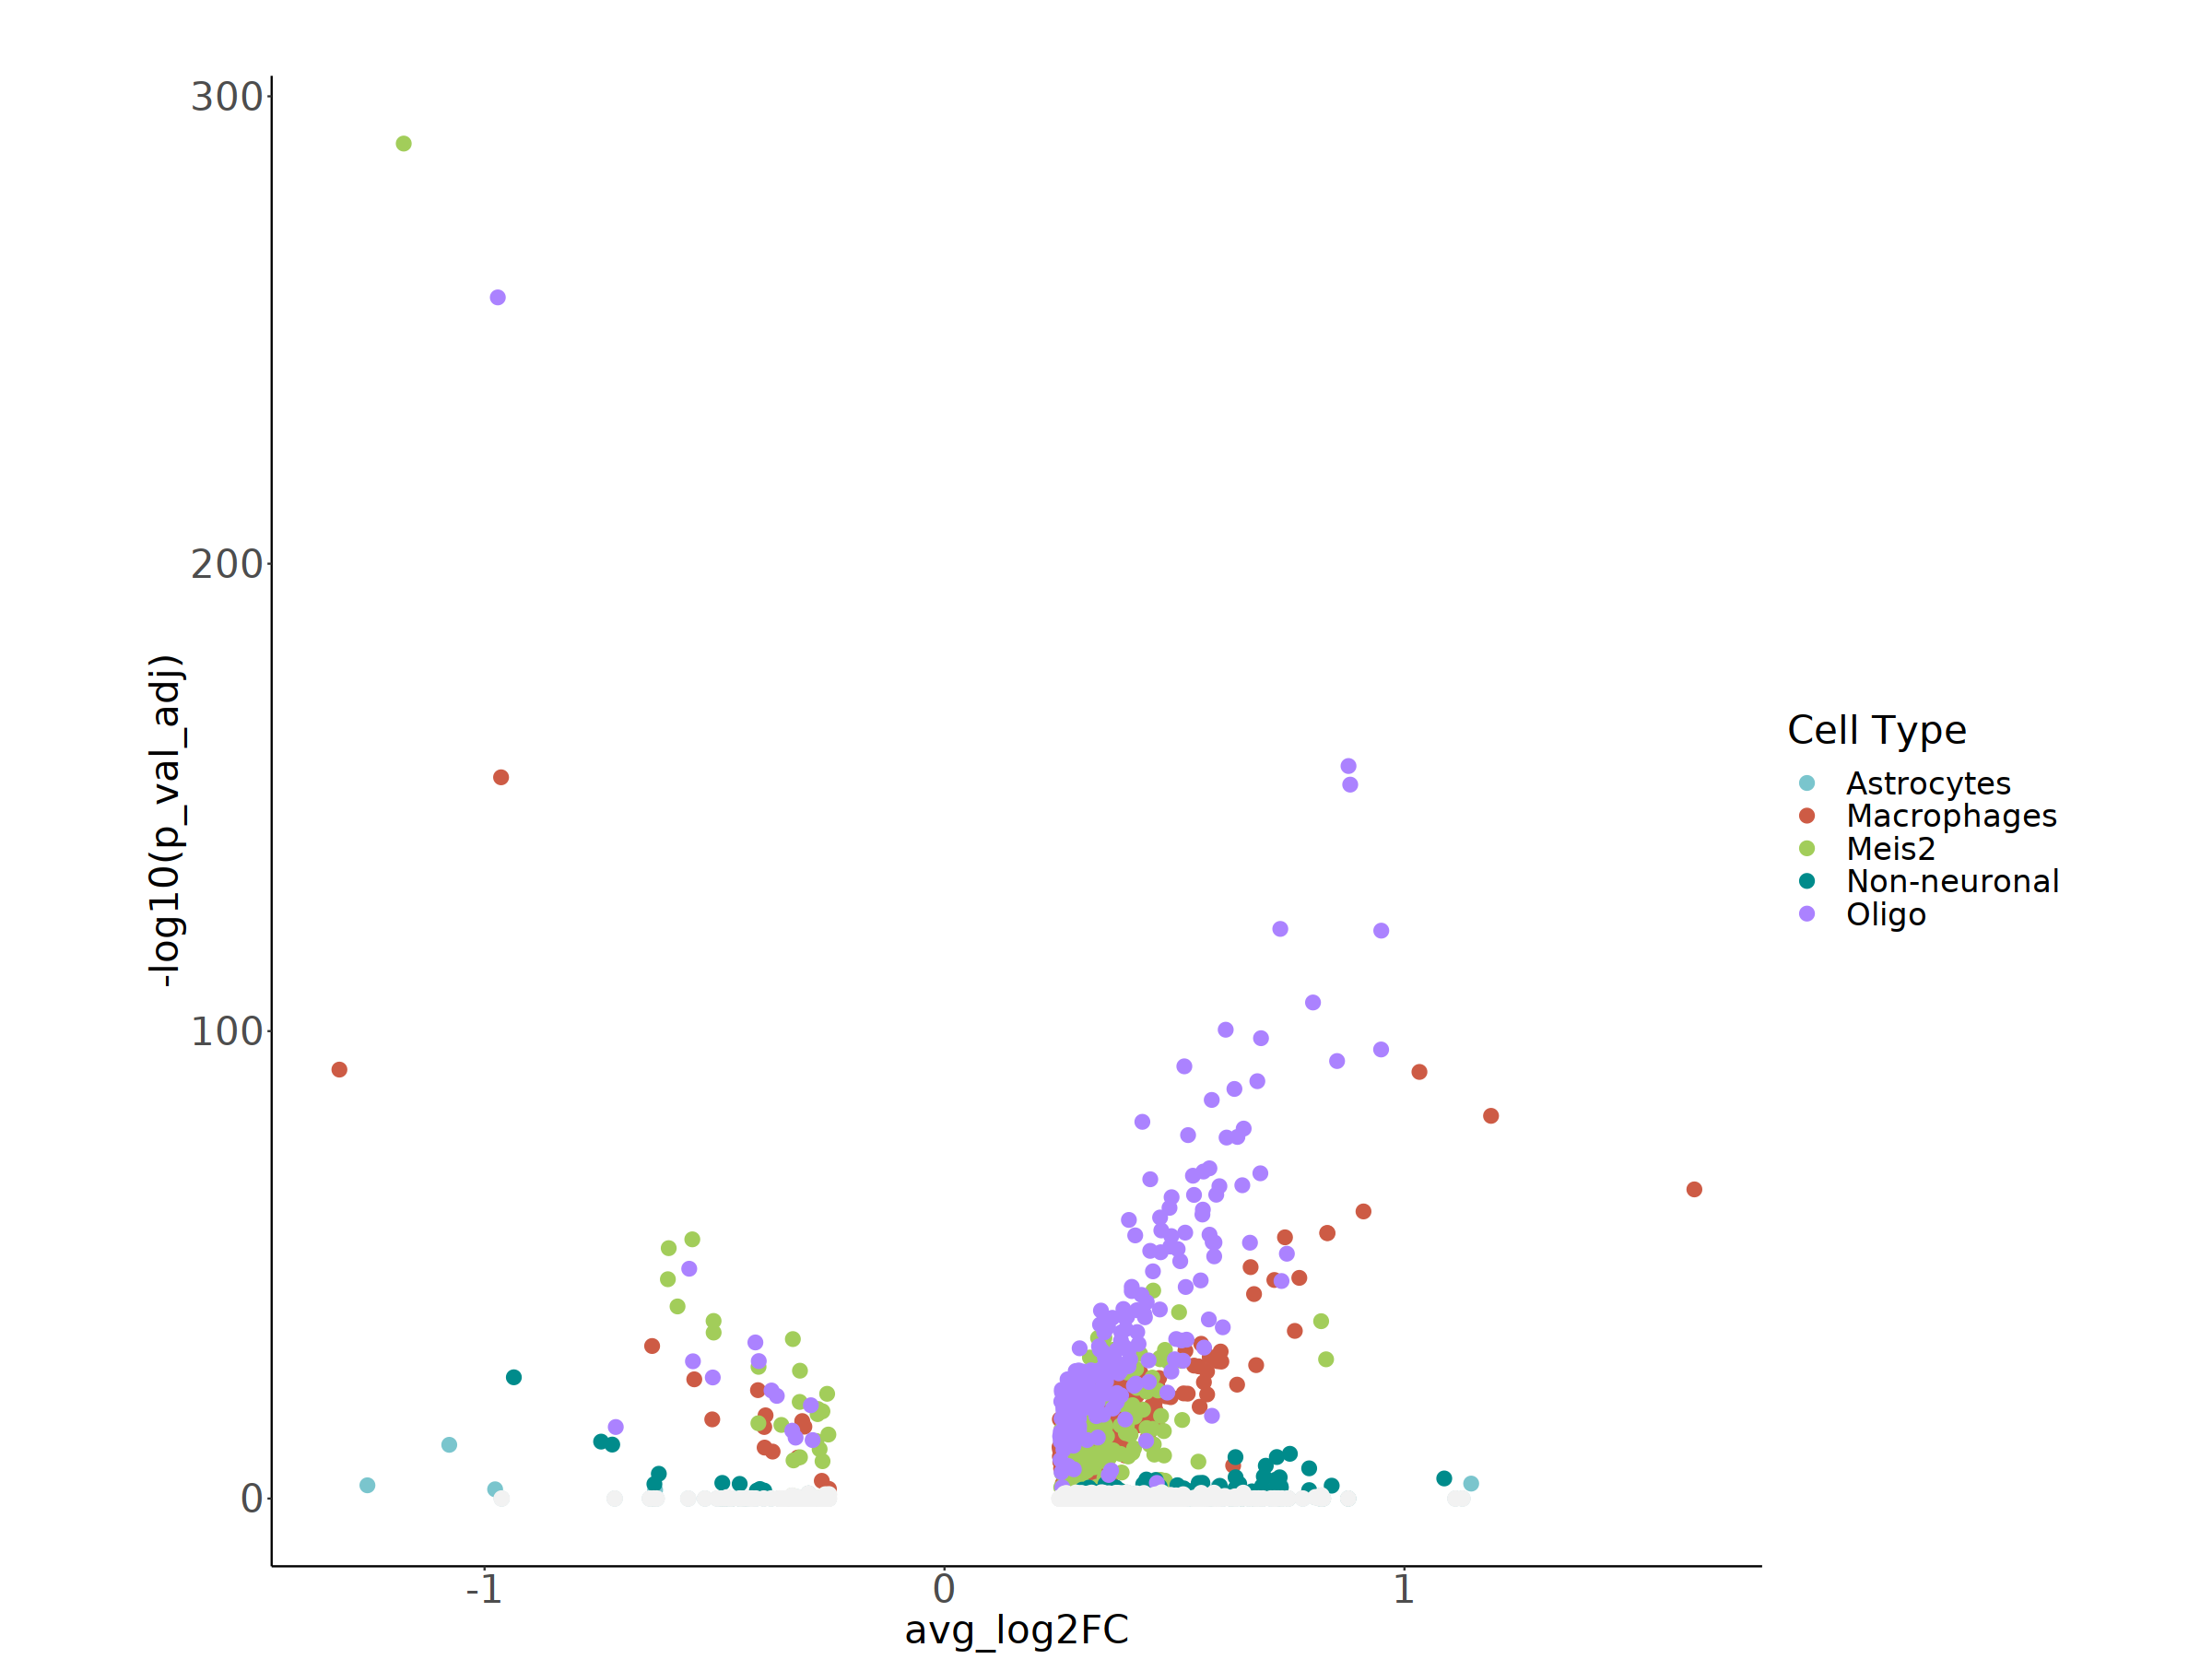

In [157]:
big_mtx <- c()
for(file in other_DEGs){
    celltype <- gsub(".txt","",str_split(file, pattern = "//")[[1]][2])
    print(celltype)
    
    ct_file <- read.table(file)
    ct_file[["celltype"]] <- celltype
    big_mtx <- rbind(big_mtx, ct_file)
}
print(dim(big_mtx))

# adding DE column
big_mtx$diffexpressed <- "NO"
big_mtx$diffexpressed[which((big_mtx$avg_log2FC > 0.25 | big_mtx$avg_log2FC < -0.25) & (big_mtx$p_val_adj < 0.05))] <- "DE"

head(big_mtx)

plot_colors <- c("cadetblue3", "coral3", "darkolivegreen3", "darkcyan",
    "mediumpurple1", "lightgreen", "lightgoldenrod", "lightslateblue", 
    "mistyrose", "lightblue4", "navajowhite1", "magenta", 
    "lightsalmon", "mediumorchid1", "midnightblue", "lightskyblue", 
    "lightgoldenrodyellow", "black", "lightgrey", "mistyrose4")

#big_mtx$celltype <- factor(big_mtx$celltype, levels = c("GABAergic.1","GABAergic.2","GABAergic.3","GABAergic.4","GABAergic.5","GABAergic.6",
#                 "GABAergic.7","GABAergic.8","GABAergic.9","GABAergic.10","GABAergic.11","GABAergic.12",
#                 "GABAergic.13","GABAergic.14","GABAergic.15"))

gplot <- ggplot(data=big_mtx, aes(x=avg_log2FC, y=-log10(p_val_adj), col = celltype)) +
        geom_point(size = 3.8) + theme_classic() +
        ggtitle("") + scale_color_manual("Cell Type", values=plot_colors) +
        theme(plot.title = element_text(color="black", size=40, hjust=0.5),
                axis.title.y = element_text(size = 25),
                axis.title.x = element_text(size = 25),
                axis.text = element_text(size = 25),
                #legend.position = "none") +
                legend.title = element_text(size = 25),
                legend.text = element_text(size = 20),
                legend.key.width = unit(0.9, "cm"),
                legend.key.height = unit(0.75, "cm")) + 
        theme(aspect.ratio = 1) +
        geom_point(data=big_mtx[(big_mtx$diffexpressed == "NO"),], aes(x=avg_log2FC, y=-log10(p_val_adj)), col = "gray95", size = 4) +
        guides(col = guide_legend(ncol = 1))
gplot

pdf(paste0(OUTPATH, "Other_volcano.pdf"), width = 12, height = 10)
gplot
dev.off()


